# Ejemplo de practico: estimación de la precipitación en el valle de México usando datos de pluviómetros y radar meteorológico.

# Introducción.
El siguiente ejemplo forma parte del artículo publicado por <cite data-cite="DiazViera2009">(Diaz,Et.Al,2009)</cite>, donde se presenta una modificación del procedimiento geoestadístico de estimación espacial de la precipitación introducido por Krajewski (1987), el cual aplica el método de cokriging ordinario, combinando imágenes de radar meteorológico con datos de pluviómetros. Aquí, a diferencia del procedimiento de Krajewski, se incluye en el método de cokriging ordinario la dependencia espacial conjunta de radar-pluviómetros mediante un modelo de corregionalización lineal. La metodología propuesta es probada usando datos de pluviógrafos y de radar de una tormenta ocurrida en el valle de la ciudad de México.

## Abrir el proyecto en R Studio.

El proyecto precargado lo pueden descargar en la página del curso http://www.esmg-mx.org/activities/courses/geoestadistica. Para el análisis exploratorio descargamos la  Clase Práctica 1: Análisis Exploratorio de Datos. Se descomprime el archivo y podemos ver que el proyecto se compone de un conjunto de carpetas; la carpeta "Functions" donde encontraran las funciones que usaremos durante la clase práctica y la carpeta "Scripts" donde encontrarán los archivos "Getting_Started_script.R" y "00 Lluvia_AED_2D.R". El primer script contiene las instrucciones para definir directorios, instalar los paquetes, cargar librerías y funciones, el segundo script contiene las instrucciones del ejemplo para hacer el análisis exploratorio. Les recomendamos que el archivo "lluvia.txt" lo guarden en la carpeta "Data".

Para abrir el proyecto en R Studio deben dar doble clic en "RGeoestad_2D_Vacio.Rproj".

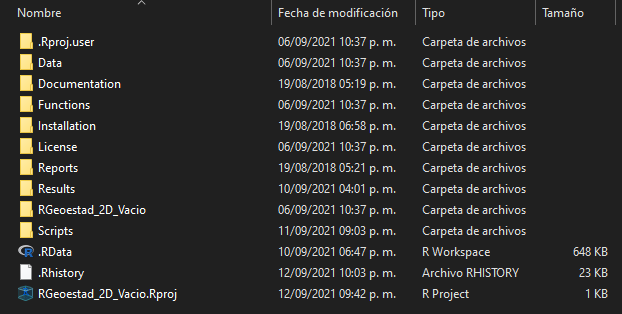

$\textbf{NOTA:}$ es importante que el proyecto se abra usando "RGeoestad_2D_Vacio.Rproj", si abren solo los scripts no podrán acceder a los directorios.


## Carga de paqueterias y funciones.

Para obtener la estimación espacial debemos instalar en R Studio los siguientes paquetes: Rcpp, maps, mapproj, actuar, fields, fitdistrplus, geoR, gstat, MASS, moments, poweRlaw, RFOC, spatstat, ADGofTest, reshape, sp.

$\textbf{NOTA: la versión de R recomendada es 4.1.1}$, de lo contrario, no podrán instalar el paquete "actuar".

Hay dos formas de instalar estos paquetes: la primera opción es ir a la barra de menús en la interfaz de R Studio, dar click en tools>install Packages.  En el renglón Packages pondrán los nombres de los paquetes separados por coma y después dan click en install.

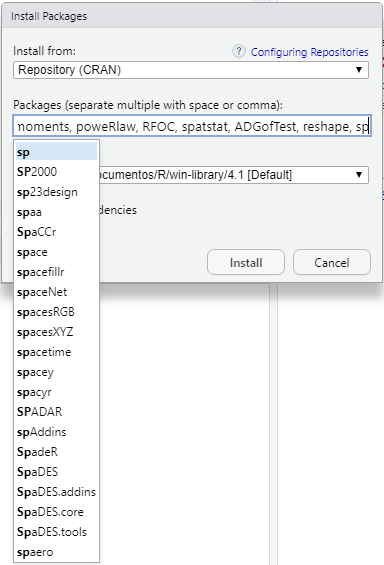

La segunda opción es usando la consola, para eso abrimos el script "Getting_Started_script.R" y ejecutar las siguientes lineas.

In [1]:
root_dir<-getwd()

#install_dir- installation directory

install_dir<-paste(root_dir,"/Installation",sep="")

setwd(install_dir)

install.packages("Rcpp")
install.packages("maps")
install.packages("mapproj")
install.packages("actuar")
install.packages("fields")
install.packages("fitdistrplus")
install.packages("geoR")
install.packages("gstat")
install.packages("MASS")
install.packages("moments")
install.packages("poweRlaw")
install.packages("RFOC")
install.packages("spatstat")
install.packages("ADGofTest")
install.packages("reshape")
install.packages("sp")

#set back to root work directory

Installing package into 'E:/OneDrive/Documentos/R/win-library/4.1'
(as 'lib' is unspecified)



package 'Rcpp' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\danie\AppData\Local\Temp\Rtmp0YmHlY\downloaded_packages


Installing package into 'E:/OneDrive/Documentos/R/win-library/4.1'
(as 'lib' is unspecified)



package 'maps' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\danie\AppData\Local\Temp\Rtmp0YmHlY\downloaded_packages


Installing package into 'E:/OneDrive/Documentos/R/win-library/4.1'
(as 'lib' is unspecified)



package 'mapproj' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\danie\AppData\Local\Temp\Rtmp0YmHlY\downloaded_packages


Installing package into 'E:/OneDrive/Documentos/R/win-library/4.1'
(as 'lib' is unspecified)



package 'actuar' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\danie\AppData\Local\Temp\Rtmp0YmHlY\downloaded_packages


Installing package into 'E:/OneDrive/Documentos/R/win-library/4.1'
(as 'lib' is unspecified)



package 'fields' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\danie\AppData\Local\Temp\Rtmp0YmHlY\downloaded_packages


Installing package into 'E:/OneDrive/Documentos/R/win-library/4.1'
(as 'lib' is unspecified)



package 'fitdistrplus' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\danie\AppData\Local\Temp\Rtmp0YmHlY\downloaded_packages


Installing package into 'E:/OneDrive/Documentos/R/win-library/4.1'
(as 'lib' is unspecified)



package 'geoR' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\danie\AppData\Local\Temp\Rtmp0YmHlY\downloaded_packages


Installing package into 'E:/OneDrive/Documentos/R/win-library/4.1'
(as 'lib' is unspecified)



package 'gstat' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\danie\AppData\Local\Temp\Rtmp0YmHlY\downloaded_packages


Installing package into 'E:/OneDrive/Documentos/R/win-library/4.1'
(as 'lib' is unspecified)



package 'MASS' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\danie\AppData\Local\Temp\Rtmp0YmHlY\downloaded_packages


Installing package into 'E:/OneDrive/Documentos/R/win-library/4.1'
(as 'lib' is unspecified)



package 'moments' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\danie\AppData\Local\Temp\Rtmp0YmHlY\downloaded_packages


Installing package into 'E:/OneDrive/Documentos/R/win-library/4.1'
(as 'lib' is unspecified)



package 'poweRlaw' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\danie\AppData\Local\Temp\Rtmp0YmHlY\downloaded_packages


Installing package into 'E:/OneDrive/Documentos/R/win-library/4.1'
(as 'lib' is unspecified)



package 'RFOC' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\danie\AppData\Local\Temp\Rtmp0YmHlY\downloaded_packages


Installing package into 'E:/OneDrive/Documentos/R/win-library/4.1'
(as 'lib' is unspecified)



package 'spatstat' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\danie\AppData\Local\Temp\Rtmp0YmHlY\downloaded_packages


Installing package into 'E:/OneDrive/Documentos/R/win-library/4.1'
(as 'lib' is unspecified)



package 'ADGofTest' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\danie\AppData\Local\Temp\Rtmp0YmHlY\downloaded_packages


Installing package into 'E:/OneDrive/Documentos/R/win-library/4.1'
(as 'lib' is unspecified)



package 'reshape' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\danie\AppData\Local\Temp\Rtmp0YmHlY\downloaded_packages


Installing package into 'E:/OneDrive/Documentos/R/win-library/4.1'
(as 'lib' is unspecified)



package 'sp' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\danie\AppData\Local\Temp\Rtmp0YmHlY\downloaded_packages


Despues de instalar los paquetes debemos cargarlos de la siguiente forma:

In [2]:
setwd(root_dir)

#### Load Packages ####
library(actuar)
library(Rcpp)
library(maps)
library(mapproj)
library(fields)
library(fitdistrplus)
library(geoR)
library(gstat)
library(MASS)
library(moments)
library(poweRlaw)
library(RFOC)
library(spatstat)
library(ADGofTest)
library(reshape)
library(sp)


Attaching package: 'actuar'


The following object is masked from 'package:grDevices':

    cm


Loading required package: spam

Loading required package: dotCall64

Loading required package: grid

Spam version 2.7-0 (2021-06-25) is loaded.
Type 'help( Spam)' or 'demo( spam)' for a short introduction 
and overview of this package.
Help for individual functions is also obtained by adding the
suffix '.spam' to the function name, e.g. 'help( chol.spam)'.


Attaching package: 'spam'


The following objects are masked from 'package:base':

    backsolve, forwardsolve


Loading required package: viridis

Loading required package: viridisLite


Attaching package: 'viridis'


The following object is masked from 'package:maps':

    unemp


See https://github.com/NCAR/Fields for
 an extensive vignette, other supplements and source code 

Loading required package: MASS

Loading required package: survival

--------------------------------------------------------------
 Analysis of Geostatistical

Comprobamos que todos los paquetes hayan sido cargados, si es asi, cargaremos las funciones. Estas nos permitirán obtener los graficos, modelos, etc.

In [3]:
root_dir<-getwd()

function_dir<-paste(root_dir,"/Functions",sep="")

setwd(function_dir)

source("AllModel.R", encoding='ISO-8859-1')
source("BasicStats.R", encoding='ISO-8859-1')
source("BestModel.R", encoding='ISO-8859-1')
source("BestModel.R")
source("BestModelName.R")
source("CDF.R")
source("CoKrigingOrd.R")
source("CoKrigingOrdAnis.R")
source("CrossValidation.R")
source("CrossValidation2.R")
source("CrossVariograma.R")
source("DEspacial.R", encoding='ISO-8859-1')
source("Distance.R")
source("Estadisticas.R")
source("EyeModel.R", encoding='ISO-8859-1')
source("FitDistribution.R", encoding='ISO-8859-1')
source("GDEspacial.R", encoding='ISO-8859-1')
source("GDirecciones.R", encoding='ISO-8859-1')
source("GNormal.R", encoding='ISO-8859-1')
source("hist2.R")
source("HistBoxplot.R")
source("HistModel.R")
source("KrigingOrd.R", encoding='ISO-8859-1')
source("KrigingOrdAnis.R", encoding='ISO-8859-1')
source("ModelVariogram.R")
source("Modelo.R")
source("Outliers.R")
source("OutliersCount.R")
source("OutliersCountTwo.R")
source("OutliersPos.R")
source("OutliersTwo.R")
source("PPplot.R")
source("QQplot.R")
source("RangoParams.R")
source("Regresion.R")
source("ScatterPlot.R")
source("Tendencia.R")
source("Transformacion.R")
source("Trend.R")
source("Val_Estadisticos.R", encoding='ISO-8859-1')
source("Validacion.R", encoding='ISO-8859-1')
source("ValidacionCross.R", encoding='ISO-8859-1')
source("Variograma.R")
source("Variograma4D.R", encoding='ISO-8859-1')
source("hist2.R")
source("scaterplot.R")
source("scaterplotReg.R")
#source("PlotGridCells.R")

setwd(root_dir)

Para saber si todos los directorios fueron cargados adecuadamente, veremos que el directorio final mostrado en la consola es "RGeoestad_2D_Vacio" como se muestra en la siguiente imagen.

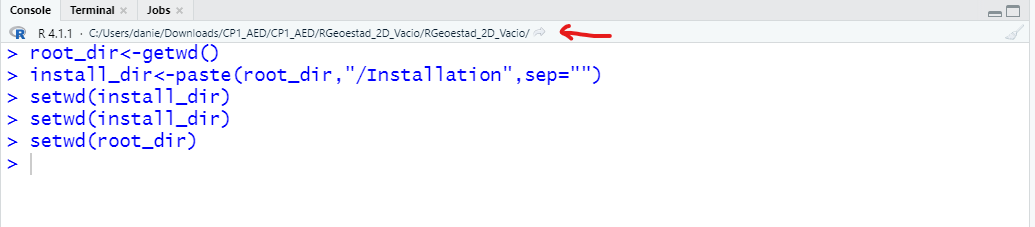

De lo contrario, se debe poner en la consola la instrucción "setwd(root_dir)" o bien se puede redirigir el directorio en la barra de menus>Session>Set Working Directory>To Project Directory. 

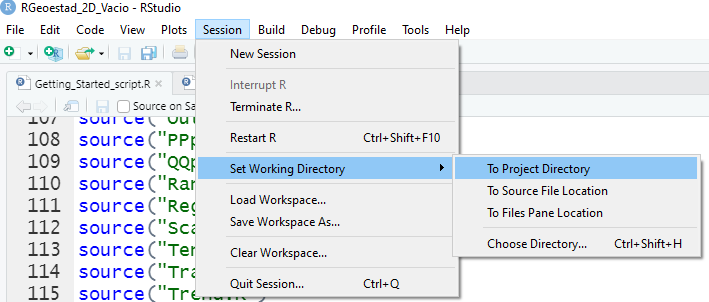

Despues de cargar las funciones podemos continuar con el análisis exploratorio.

Es importante recordar que cada vez que se abre el proyecto en R Studio se deben cargar solo las librerias como se muestra en la siguiente imagen.

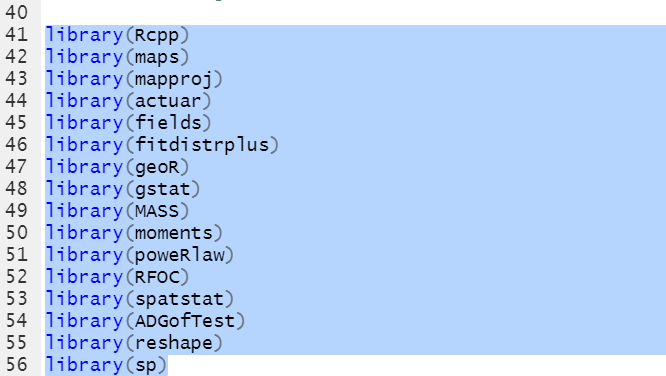

$\textbf{NOTA:}$ Si este proceso se hace en este notebook, se deben cargar solo las librerias y las funciones.

## Carga de datos.

Ahora tenemos que cargar los datos de cada variable con su respectiva posicion espacial en coordenadas UTM. Es importante que cada columna tenga su propio encabezado, así será fácil localizarlos e indexarlos. Para seleccionar el archive que contiene la información que necesitamos, ejecutamos el comando “read.table”, el cual contiene las siguientes tres instrucciones: file=file.choose(), esta instrucción indica que quieres seleccionar el archivo usando una ventana emergente similar a la mostrada en la siguiente imagen: 

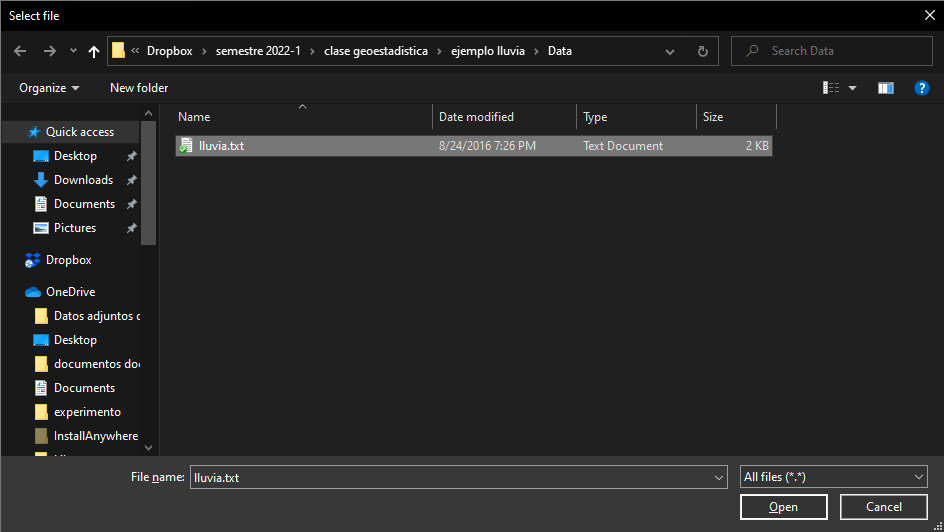

header=TRUE indica que las columnas tienen encabezado y  na.strings="-999.25" es una condicional para que cualquier celda nula sea llenada con el número -999.25.

In [6]:
Data_File <- read.table(file=file.choose(),header=TRUE,na.strings="-999.25")

Si se desea abrir un archivo con información delimitada por comas (.csv) se cambia la instrucción por: "Data_File <- read.csv(file=file.choose(),header=T,na.strings="-999.25")" 

Para ordenar los resultados necesitamos crear una carpeta que usemos específicamente para el análisis exploratorio de datos (AED), ahí se almacenarán tablas e imágenes, esto lo hacemos con el comando "dir.create", donde le indicaremos la ruta donde se creará la carpeta AED.

$\textbf{Nota: no es necesario ejecutar esta línea más de una vez, de lo contrario R Studio mostrará un error}$ "Warning message in dir.create(paste(getwd(), "/Results/AED", sep = ""))  already exists"

In [7]:
dir.create(paste(getwd(),"/Results/AED", sep=""))

Warning message in dir.create(paste(getwd(), "/Results/AED", sep = "")):
"'C:\Users\danie\Dropbox\semestre 2022-1\clase geoestadistica\ejemplo lluvia\Results\AED' already exists"


# Análisis exploratorio de datos.

Como se mostró en clase, el objetivo del análisis exploratorio es examinar las variables aleatorias disponibles y establecer si estas cumplen con los supuestos que requiere la estimación. Por lo tanto, debemos verificar su normalidad, linealidad, homocedasticidad, identificar los valores atípicos (outliers) y evaluar el impacto que tendrán estos valores durante el análisis variográfico y por supuesto, la estimación.

Para este ejemplo las variables son los valores obtenidos de los pluviómetros (Pluv_mm) y del radar meteorológico (Radar_mm), los cuales tienen una distribución espacial en coordenadas UTM.

Después de cargar el archivo con la información y asignarle el nombre "Data_File", necesitamos las variables aleatorias y su posición espacial. Esto lo podemos hacer de la siguiente forma: 

In [8]:
XCoord<-Data_File$UTM_X_m      #Coordenada UTM en x
YCoord<-Data_File$UTM_Y_m      #Coordenada UTM en y
Radar_mm<-Data_File$Radar_mm   #variable con la información del radar metereológico
Pluv_mm<-Data_File$Pluv_mm     #variable con la información de los pluviómetros

Ya que tenemos las variables necesitamos saber sobre sus estadígrafos, esto lo podemos calcular usando la función "Estadisticas". Es importante mencionar que los valores calculados en este paso se usarán en los gráficos.

In [9]:
XCoord_Stat<-Estadisticas(XCoord)
YCoord_Stat<-Estadisticas(YCoord)
Radar_mm_Stat<-Estadisticas(Radar_mm)
Pluv_mm_Stat<-Estadisticas(Pluv_mm)

##  Análisis estadístico univariado.

Para la interpretación estadística univariada comenzaremos dos elementos: la tabla con los valores estadísticos y el histograma con boxplot. La tabla con los estadígrafos la obtenemos usando la función "Val_Estadisticos" y la guardamos en la carpeta "AED" con la instrucción "write.csv".

In [10]:
Data_File_Stat <- Val_Estadisticos(Data_File)
write.csv(Data_File_Stat , file = "Results/AED/Data_File_Stat.csv")  #esta linea sirve para guardar los resultados en un archivo csv
print(Data_File_Stat[,3:4])

                   Radar_mm  Pluv_mm
No_muestras        50.00000 50.00000
Minimo              0.18000  0.25000
Cuartil_1er         0.87750  0.31250
Mediana             1.42500  1.00000
Media               1.83500  1.47000
Cuartil_3er         2.37500  1.93750
Maximo              7.79000  7.75000
Rango               7.61000  7.50000
Rango_Intercuartil  1.49750  1.62500
Varianza            2.47352  2.57561
Desv_Estandar       1.57274  1.60487
Simetria            2.02492  2.46929
Curtosis            7.99412 10.05416


### Análisis estadístico univariado para el radar metereológico (Radar_mm).

El histograma con boxplot se grafica usando la función "HistBoxplot", esta necesita que le indiquemos el vector con los valores (x), su valor esperado (mean) y su mediana (median). Si observan la instrucción para obtener el histograma para el radar meteorológico, el valor esperado y la mediana la toma de la tabla que se generó con la función "Estadisticas". Por ejemplo, la instrucción "Radar_mm_Stat[5,2]" indica que el valor esperado se encuentra en la fila 5 columna 2. también podemos indicar el número de bins que necesitamos, en este caso es "nbin = 9", es importante recordar que el número por default que encontrarán es 9, pero puede cambiarse según las necesidades del usuario.

La función "HistBoxplot" puede generar dos tipos de histograma: de frecuencia absoluta y de frecuencia relativa. Para obtener el histograma de frecuencia absoluta debemos indicar que "AbsFreq = TRUE, PercentFreq = FALSE" y para el histograma de frecuencia relativa debemos indicar que "AbsFreq = FALSE, PercentFreq = TRUE".

El histograma para el radar metereológico (Radar_mm) con frecuencia absoluta es:

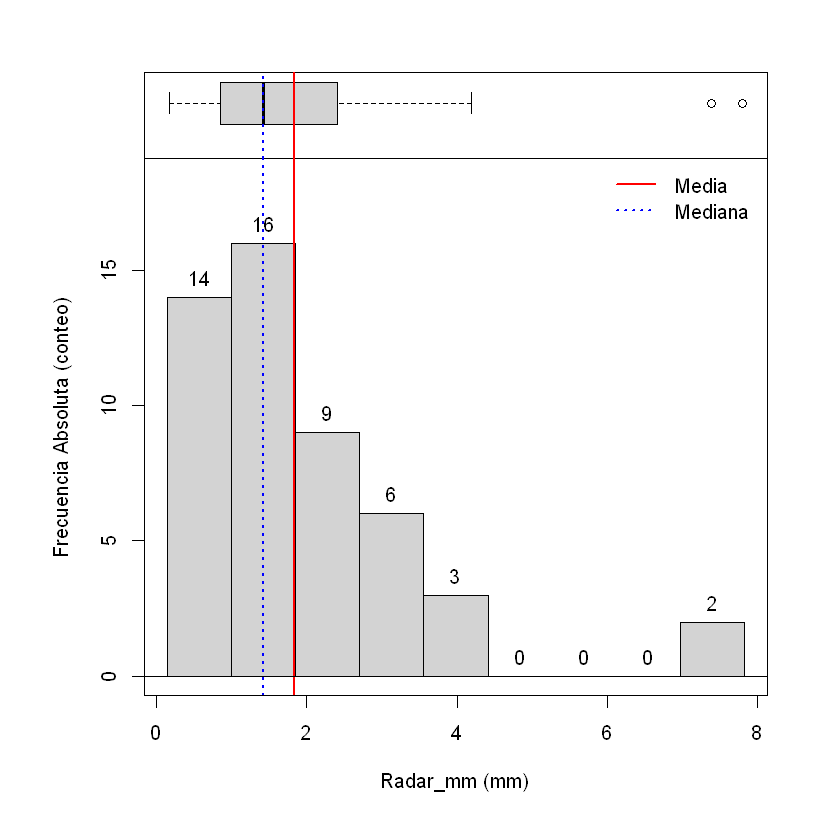

In [11]:
HistBoxplot(x=Radar_mm, mean = Radar_mm_Stat[5,2], median = Radar_mm_Stat[4,2], main ="",  
            xlab = "Radar_mm (mm)", ylab = "Frecuencia Absoluta (conteo)", AbsFreq = TRUE, PercentFreq = FALSE,
            nbin = 9)

Y el histograma del radar metereológico con frecuencia relativa es:

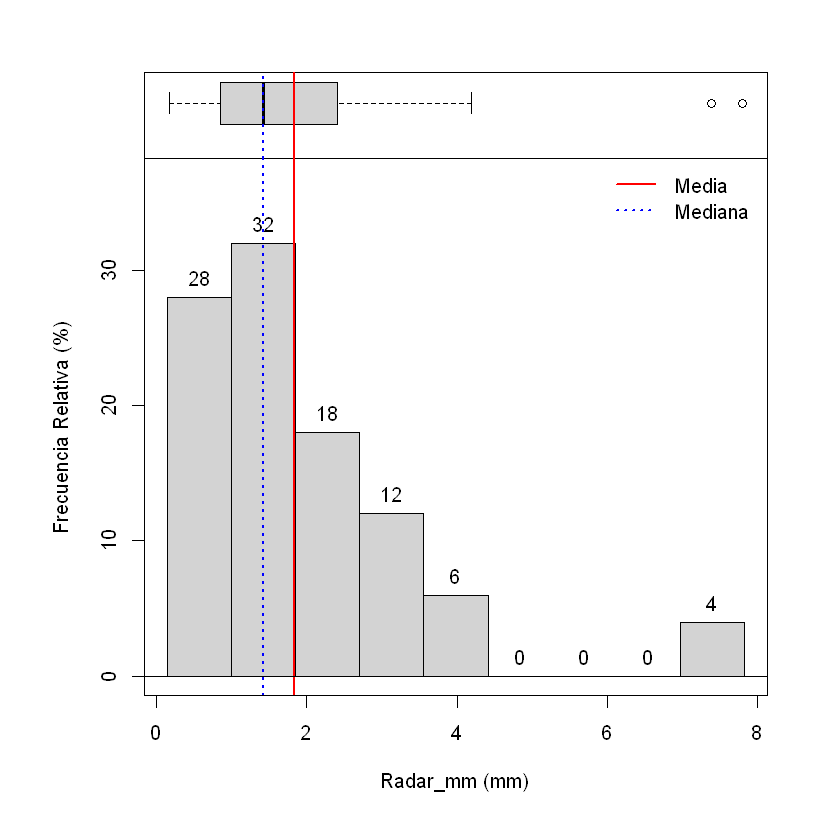

In [10]:
HistBoxplot(x=Radar_mm, mean = Radar_mm_Stat[5,2], median = Radar_mm_Stat[4,2], main ="", 
            xlab = "Radar_mm (mm)", ylab = "Frecuencia Relativa (%)", AbsFreq = FALSE, PercentFreq = TRUE,
            nbin = 9)

Analizando los histogramas y los estadígrafos de la variable del radar meteorológico (Radar_mm) tiene una diferencia entre la media y la mediana de 0.47, su coeficiente de asimetría es de 2.46929, lo cual significa que la variable es asimétrica. Esto se confirma con los histogramas, los cuales muestran que la asimetría es positiva. También podemos notar que el boxplot muestra dos valores atípicos localizados en el extremo derecho. El valor de la curtosis es de 7.99412, lo cual nos indica que es leptocúrtica.

Para saber cuáles son esos valores atípicos usamos la función "OutliersPos".

In [12]:
Radar_mm_outliers<-OutliersPos(Radar_mm)
Data_File[Radar_mm_outliers,c(1,2,3)]

,UTM_X_m,UTM_Y_m,Radar_mm
,<int>,<int>,<dbl>
32,482135,2129478,7.79
36,497898,2129469,7.39


Ahí podemos notar que la muestra 32 y 36 son los valores atípicos, por lo que retiramos esos valores de la variable, esto lo hacemos usando una variable nueva que llamaremos "Radar_mm_out". También necesitamos calcular los valores estadísticos de esta nueva variable.

$\textbf{NOTA: retirar los valores atípicos no significa que no usaremos más adelante, los necesitaremos para saber si es conveniente o no quitarlos, para eso se genera un nuevo vector.}$. Por ejemplo, el vector "Radar_mm" es el vector original, el vector "Radar_mm_out" contiene todos los valores excepto aquellos que fueron señalados como valores atípicos.

In [13]:
Radar_mm_out<-Radar_mm[-Radar_mm_outliers]
Radar_mm_out_Stat<-Estadisticas(Radar_mm_out)
Radar_mm_out_Stat

,Statistics,Values
,<chr>,<dbl>
muestras,n,48.0000
minimos,Minimum,0.1800
cuantiles1,1st. Quartile,0.8050
medianas,Median,1.3500
medias,Mean,1.5952
cuantiles3,3rd. Quartile,2.2475
maximos,Maximum,4.1900
rangos,Rank,4.0100
rangosInt,Interquartile Rank,1.4425


Volvemos a graficar el histograma para los valores obtenidos con el radar metereológico sin valores atípicos (Radar_mm_out) con frecuencia absoluta.

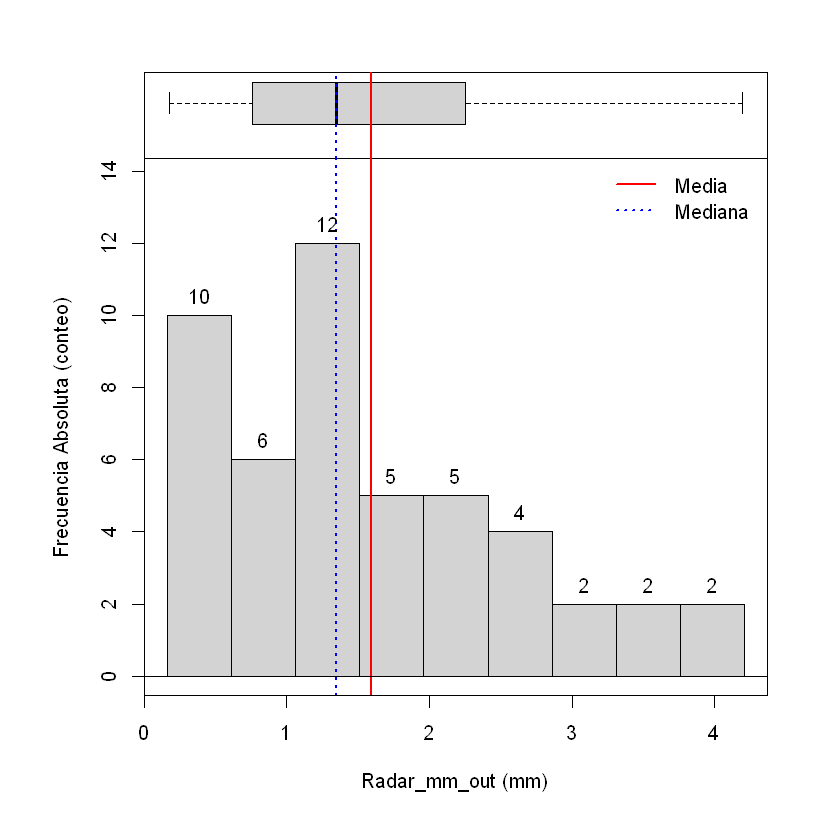

In [14]:
HistBoxplot(x=Radar_mm_out, mean = Radar_mm_out_Stat[5,2], median = Radar_mm_out_Stat[4,2], main ="",  
            xlab = "Radar_mm_out (mm)", ylab = "Frecuencia Absoluta (conteo)", AbsFreq = TRUE, PercentFreq = FALSE,
            nbin = 9)

Y el histograma para los valores obtenidos con el radar metereológico sin valores atípicos (Radar_mm_out) con frecuencia relativa.

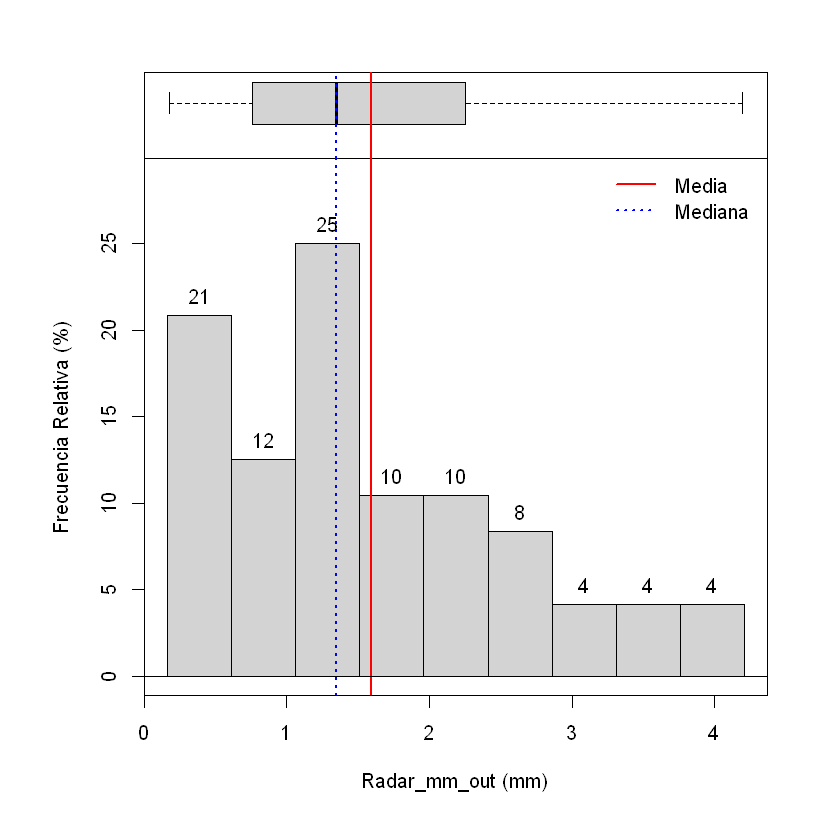

In [15]:
HistBoxplot(x=Radar_mm_out, mean = Radar_mm_out_Stat[5,2], median = Radar_mm_out_Stat[4,2], main ="", 
            xlab = "Radar_mm_out (mm)", ylab = "Frecuencia Relativa (%)", AbsFreq = FALSE, PercentFreq = TRUE,
            nbin = 9)

Analizando la diferencia entre me media y la mediana de esta nueva variable es de 0.2452 y su asimetría es de 0.6937. En principio esto nos indica que la asimetría disminuyó, sin embargo, la variable sigue mostrando asimetría positiva. Con el caso de la curtosis, el valor pasó de 7.99412 a 2.7723, con lo cual consideramos que es planicúrtica.

Ahora podemos observar que los boxplot no muestran nuevos valores atípicos para la variable del radar meteorológico sin valores atípicos (Radar_mm_out). Esto lo podemos confirmar usando la función "OutliersPos".

In [16]:
Radar_mm_out_outliers<-OutliersPos(Radar_mm_out)
print(Radar_mm_out_outliers)

numeric(0)


#### Transformación de variable para el radar metereológico (Radar_mm).

Dado que no se logró obtener la normalidad en esta variable, podemos usar alguna transformación. 

En estadística, la transformación de datos es la aplicación de una función matemática determinista a cada punto en un conjunto de datos, es decir, cada punto de datos $z_i$ se reemplaza con el valor transformado $y_i=f(z_i)$, donde $f$ es una función.

Las transformaciones generalmente se aplican para que los datos parezcan cumplir más con los supuestos de un procedimiento de inferencia estadística que se aplicará o para mejorar la interpretabilidad o la apariencia de los gráficos. 

Las razones más comunes para aplicar una transformación son:

* Reducir la asimetría.
* Lograr relaciones de dependencia lineales o cuasi lineales
* Conveniencia.

Las transformaciones más comunes son:

| Asimetrías positivas | Ecuación | Asimetrías negativas | Ecuación |
| :------------------ | :------ | :------------------ | :------ | 
| Raíz cuadrada | $$v_{at}=\sqrt{v_a}$$ | Potencias | $$v_{at}=v_a^n$$ |
| Logarítmica | $$v_{at}=Log(v_a)$$ | Arcseno | $$v_{at}=arcsen(v_a)$$ |
| Recíproca | $$v_{at}=\frac{1}{v_a}$$ | Exponencial | $$v_{at}=exp(v_a)$$ |


Donde ${v_a}$ es la variable aleatoria y $v_{at}$ es la variable aleatoria transformada.

$\textbf{NOTA: El usuario debe saber si la transformación puede ser usada en la variable aleatoria}$. Por ejemplo, si la variable aleatoria contiene muestras con valor cero, entonces no podrá usar las transformaciones logarítmica o reciproca. Si desea usar la transformación arcseno, la variable aleatoria debe tener componente trigonométrica.

Dado que la variable del radar meteorológico (Radar_mm) presenta asimetría positiva, se van a usar dos tipos de transformaciones: raíz cuadrada y logarítmica.

$\textbf{Transformación de raíz cuadrada}$

Empezaremos con la transformación de raíz cuadrada usando el vector "Radar_mm", la cual se hace de la siguiente forma:


In [19]:
Data_File$Radar_mm_Sqrt<-sqrt(Radar_mm)
Radar_mm_Sqrt <- Data_File$Radar_mm_Sqrt

Ya que obtenemos la variable aleatoria transformada por raiz cuadrada (Radar_mm_Sqrt), debemos obtener sus estadígrafos.

In [20]:
# Estadística basica
Radar_mm_Sqrt_Stat<-Estadisticas(Radar_mm_Sqrt) #estos valores los necesitamos para poder graficar los histogramas

# Estadística basica comparativa entre (Radar_mm) y la transformación (Radar_mm_Sqrt)
Data_File_Stat <- Val_Estadisticos(Data_File)
Data_File_Stat[,c(3,5)]

,Radar_mm,Radar_mm_Sqrt
,<dbl>,<dbl>
No_muestras,50.00000,50.00000
Minimo,0.18000,0.42426
Cuartil_1er,0.87750,0.93641
Mediana,1.42500,1.19364
Media,1.83500,1.25106
Cuartil_3er,2.37500,1.54098
Maximo,7.79000,2.79106
Rango,7.61000,2.36679
Rango_Intercuartil,1.49750,0.60456


Y graficamos los histogramas con frecuencia absoluta y relativa de la transformación raíz cuadrada.

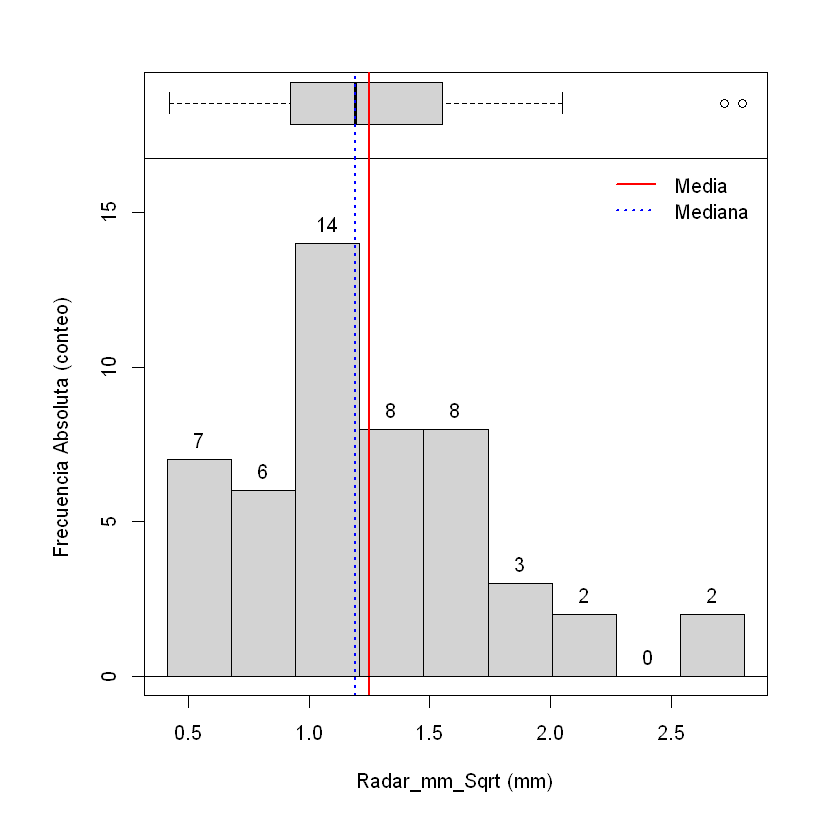

In [21]:
HistBoxplot(x=Radar_mm_Sqrt, mean = Radar_mm_Sqrt_Stat[5,2], median = Radar_mm_Sqrt_Stat[4,2], main ="",  
            xlab = "Radar_mm_Sqrt (mm)", ylab = "Frecuencia Absoluta (conteo)", AbsFreq = TRUE, PercentFreq = FALSE,
            nbin = 9)

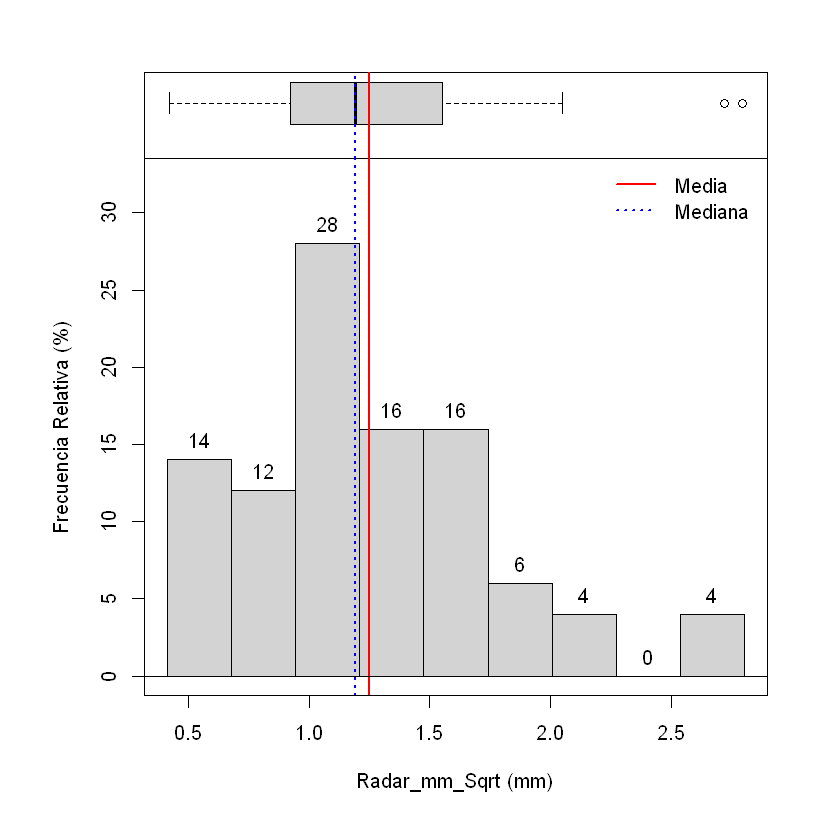

In [22]:
HistBoxplot(x=Radar_mm_Sqrt, mean = Radar_mm_Sqrt_Stat[5,2], median = Radar_mm_Sqrt_Stat[4,2], main ="", 
            xlab = "Radar_mm_Sqrt (mm)", ylab = "Frecuencia Relativa (%)", AbsFreq = FALSE, PercentFreq = TRUE,
            nbin = 9)

Si observamos la diferencia entre la media y la mediana de la variable transformada (Radar_mm_Sqrt) podemos notar que es de 0.05742, lo cual podemos considerar como muy bajo en comparación de la diferencia obtenida de la variable sin transformar que es de 0.47, sin embargo, observamos que el boxplot muestra la presencia de dos valores atípicos, los cuales debemos retirar y verificar que no afecten la supuesta simetría que hemos logrado con la transformación.

In [23]:
Radar_mm_Sqrt_outliers<-OutliersPos(Radar_mm_Sqrt)
Data_File[Radar_mm_Sqrt_outliers,c(1,2,5)]

,UTM_X_m,UTM_Y_m,Radar_mm_Sqrt
,<int>,<int>,<dbl>
32,482135,2129478,2.791057
36,497898,2129469,2.718455


Retiramos los valores atípicos y obtenemos los valores estadísticos.

In [24]:
Radar_mm_Sqrt_out<-Radar_mm_Sqrt[-Radar_mm_Sqrt_outliers]
Radar_mm_Sqrt_out_stat<-Estadisticas(Radar_mm_Sqrt_out)
Radar_mm_Sqrt_out_stat

,Statistics,Values
,<chr>,<dbl>
muestras,n,48.0000
minimos,Minimum,0.4243
cuantiles1,1st. Quartile,0.8961
medianas,Median,1.1618
medias,Mean,1.1884
cuantiles3,3rd. Quartile,1.4992
maximos,Maximum,2.0469
rangos,Rank,1.6227
rangosInt,Interquartile Rank,0.6031


Y graficamos sus histogramas.

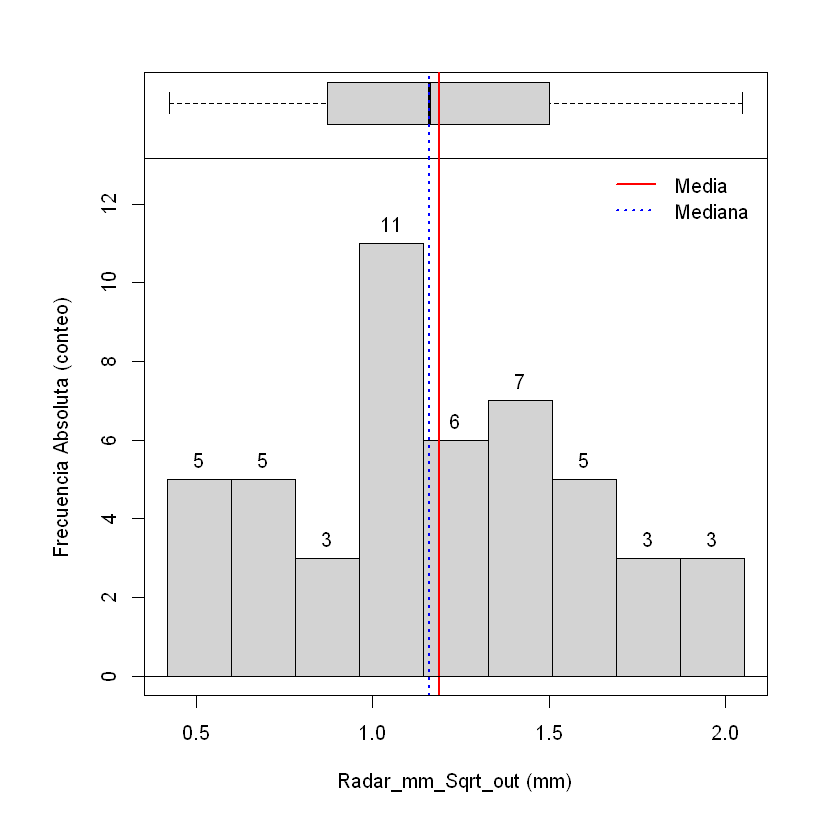

In [25]:
HistBoxplot(x=Radar_mm_Sqrt_out, mean = Radar_mm_Sqrt_out_stat[5,2], median = Radar_mm_Sqrt_out_stat[4,2], main ="",  
            xlab = "Radar_mm_Sqrt_out (mm)", ylab = "Frecuencia Absoluta (conteo)", AbsFreq = TRUE, PercentFreq = FALSE,
            nbin = 9)

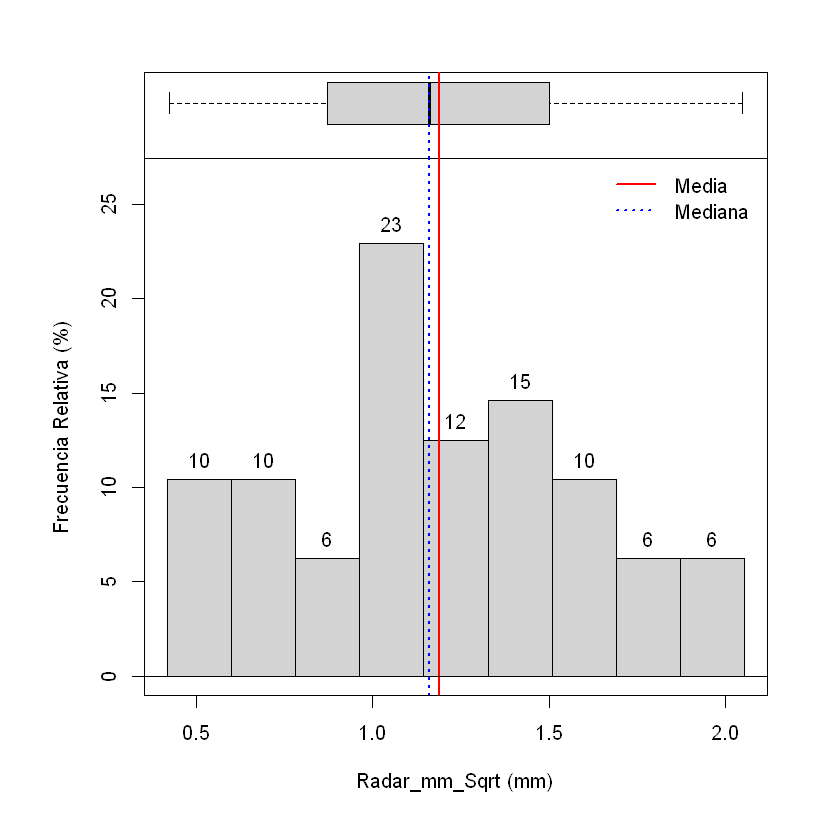

In [26]:
HistBoxplot(x=Radar_mm_Sqrt_out, mean = Radar_mm_Sqrt_out_stat[5,2], median = Radar_mm_Sqrt_out_stat[4,2], main ="", 
            xlab = "Radar_mm_Sqrt (mm)", ylab = "Frecuencia Relativa (%)", AbsFreq = FALSE, PercentFreq = TRUE,
            nbin = 9)

Confirmamos que no existan más valores atípicos.

In [27]:
OutliersPos(Radar_mm_Sqrt_out)

numeric(0)

Con los resultados obtenidos al retirar los dos valores atípicos podemos notar que la diferencia entre la media y la mediana pasaron de  0.05742 a 0.0266, podemos considerar que la transformación cumplió su propósito al reducir de manera significativa la asimetría, sin embargo, comparando las muestras transformadas con y sin valores atípicos podría no justificar el retiro de los valores atípicos ya que es muy pequeña la diferencia. 

$\textbf{Transformación logarítmica}$

Ahora probaremos usando la transformación logarítmica. La cual se hace de la siguiente forma:

In [28]:
Data_File$Radar_mm_Log<-log(Radar_mm)
Radar_mm_Log <- Data_File$Radar_mm_Log

y al igual que la transformada por raíz cuadrada, obtenemos sus valores estadísticos.

In [29]:
# Basic Statistics
Radar_mm_Log_Stat<-Estadisticas(Radar_mm_Log)

# Estadística basica comparativa entre (Radar_mm), la transformación (Radar_mm_Sqrt) y (Radar_mm_Log)
Data_File_Stat <- Val_Estadisticos(Data_File)
Data_File_Stat[,c(3,5,6)]

,Radar_mm,Radar_mm_Sqrt,Radar_mm_Log
,<dbl>,<dbl>,<dbl>
No_muestras,50.00000,50.00000,50.00000
Minimo,0.18000,0.42426,-1.71480
Cuartil_1er,0.87750,0.93641,-0.13209
Mediana,1.42500,1.19364,0.35387
Media,1.83500,1.25106,0.26569
Cuartil_3er,2.37500,1.54098,0.86467
Maximo,7.79000,2.79106,2.05284
Rango,7.61000,2.36679,3.76764
Rango_Intercuartil,1.49750,0.60456,0.99676


Y graficamos sus respectivos histogramas.

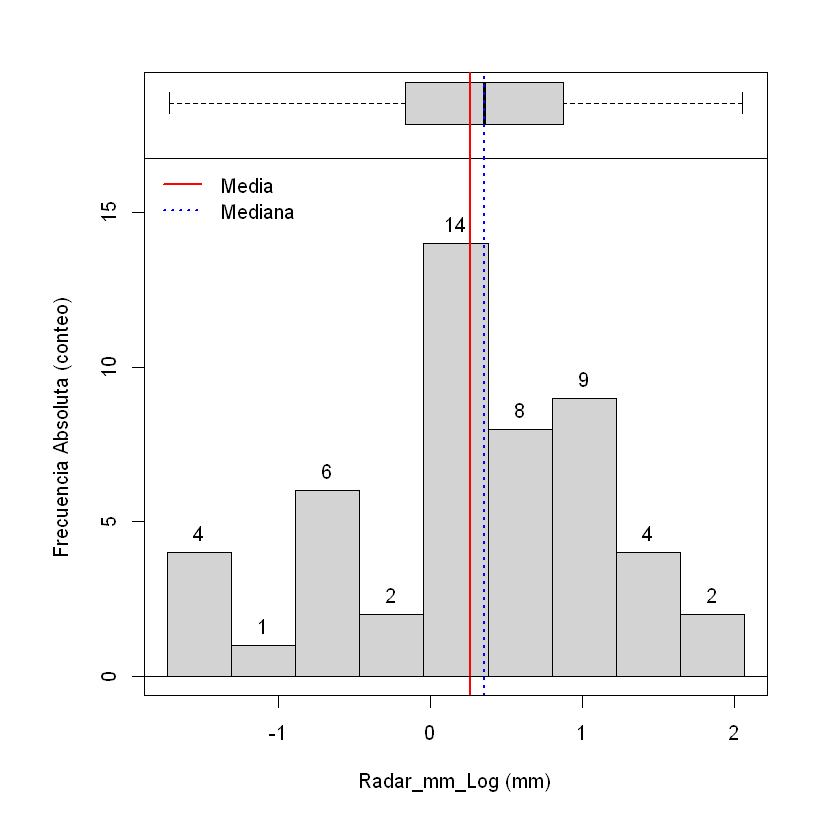

In [30]:
HistBoxplot(x=Radar_mm_Log, mean = Radar_mm_Log_Stat[5,2], median = Radar_mm_Log_Stat[4,2], main ="",  
            xlab = "Radar_mm_Log (mm)", ylab = "Frecuencia Absoluta (conteo)", AbsFreq = TRUE, PercentFreq = FALSE,
            nbin = 9)

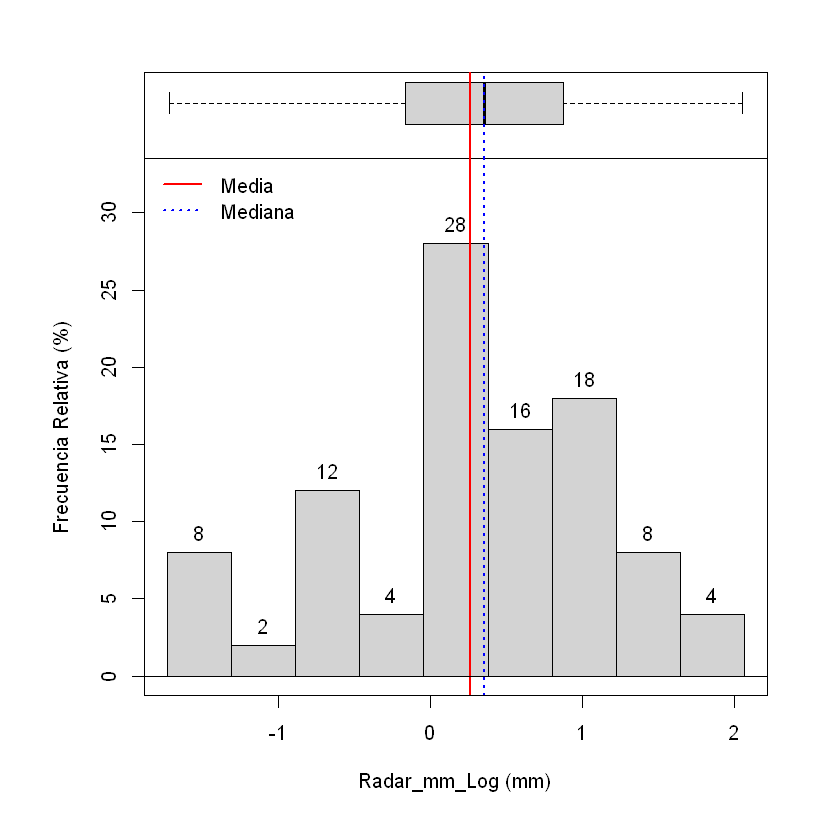

In [31]:
HistBoxplot(x=Radar_mm_Log, mean = Radar_mm_Log_Stat[5,2], median = Radar_mm_Log_Stat[4,2], main ="", 
            xlab = "Radar_mm_Log (mm)", ylab = "Frecuencia Relativa (%)", AbsFreq = FALSE, PercentFreq = TRUE,
            nbin = 9)

La diferencia entre la media y la mediana de la transformación logarítmica es de 0.08818, de forma aparente esta diferencia es mayor comparada con la transformación por raíz cuadrada. El boxplot indica que no existen valores atípicos, sin embargo, se usará la función para detectar los valores atípicos.

In [32]:
Radar_mm_Log_outliers<-OutliersPos(Radar_mm_Log)
Data_File[Radar_mm_Log_outliers,c(1,2,6)]

,UTM_X_m,UTM_Y_m,Radar_mm_Log
,<int>,<int>,<dbl>
22,462178,2133934,-1.714798
49,503149,2123937,-1.660731


Como podemos ver, la función ha detectado dos valores atípicos, los cuales retiraremos y obtenemos sus valores estadísticos.

In [33]:
Radar_mm_Log_out<-Radar_mm_Log[-Radar_mm_Log_outliers]

# Estadística básica
Radar_mm_Log_out_Stat<-Estadisticas(Radar_mm_Log_out)
Radar_mm_Log_out_Stat

,Statistics,Values
,<chr>,<dbl>
muestras,n,48.0000
minimos,Minimum,-1.5606
cuantiles1,1st. Quartile,-0.0027
medianas,Median,0.3784
medias,Mean,0.3471
cuantiles3,3rd. Quartile,0.8868
maximos,Maximum,2.0528
rangos,Rank,3.6135
rangosInt,Interquartile Rank,0.8895


Y graficamos sus histogramas: 

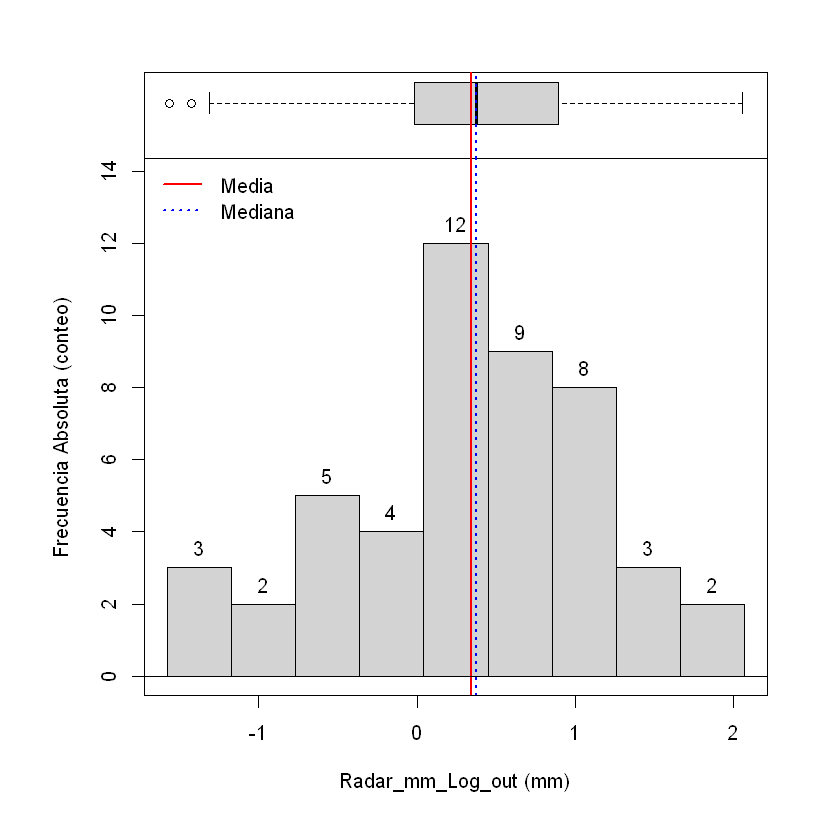

In [34]:
HistBoxplot(x=Radar_mm_Log_out, mean = Radar_mm_Log_out_Stat[5,2], median = Radar_mm_Log_out_Stat[4,2], main ="", 
            xlab = "Radar_mm_Log_out (mm)", ylab = "Frecuencia Absoluta (conteo)", AbsFreq = TRUE, PercentFreq = FALSE,
            nbin = 9)

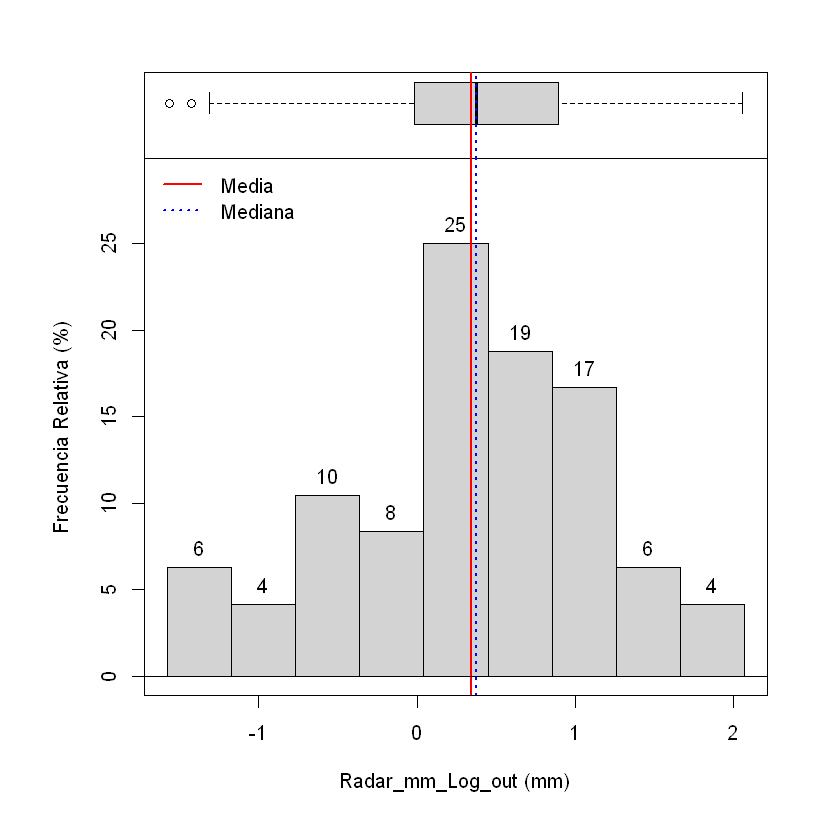

In [35]:
HistBoxplot(x=Radar_mm_Log_out, mean = Radar_mm_Log_out_Stat[5,2], median = Radar_mm_Log_out_Stat[4,2], main ="", 
            xlab = "Radar_mm_Log_out (mm)", ylab = "Frecuencia Relativa (%)", AbsFreq = FALSE, PercentFreq = TRUE,
            nbin = 9)

La diferencia entre la media y la mediana de la transformación logarítmica quitando los valores atípicos detectados pasó de 0.08818 a 0.0313, sin embargo, el boxplot muestran dos valores atípicos localizados a la izquierda del gráfico. Por lo tanto, retiraremos esos nuevos valores atípicos.

In [36]:
Radar_mm_Log_outliers2<-OutliersPos(Radar_mm_Log_out)
Radar_mm_Log_out[Radar_mm_Log_outliers2]

[1] -1.427116 -1.560648

Y hacemos un analisis estadístico de este nuevo conjunto de valores.

In [37]:
# Variable without distributional outliers 2
Radar_mm_Log_out2<-Radar_mm_Log_out[-Radar_mm_Log_outliers2]

#2º analisis sin valores atipicos
# Estadística básica
Radar_mm_Log_out2_Stat<-Estadisticas(Radar_mm_Log_out2)
Radar_mm_Log_out2_Stat

,Statistics,Values
,<chr>,<dbl>
muestras,n,46.0000
minimos,Minimum,-1.3093
cuantiles1,1st. Quartile,0.0440
medianas,Median,0.3920
medias,Mean,0.4271
cuantiles3,3rd. Quartile,0.9011
maximos,Maximum,2.0528
rangos,Rank,3.3622
rangosInt,Interquartile Rank,0.8571


Y graficamos su respectivo histograma.

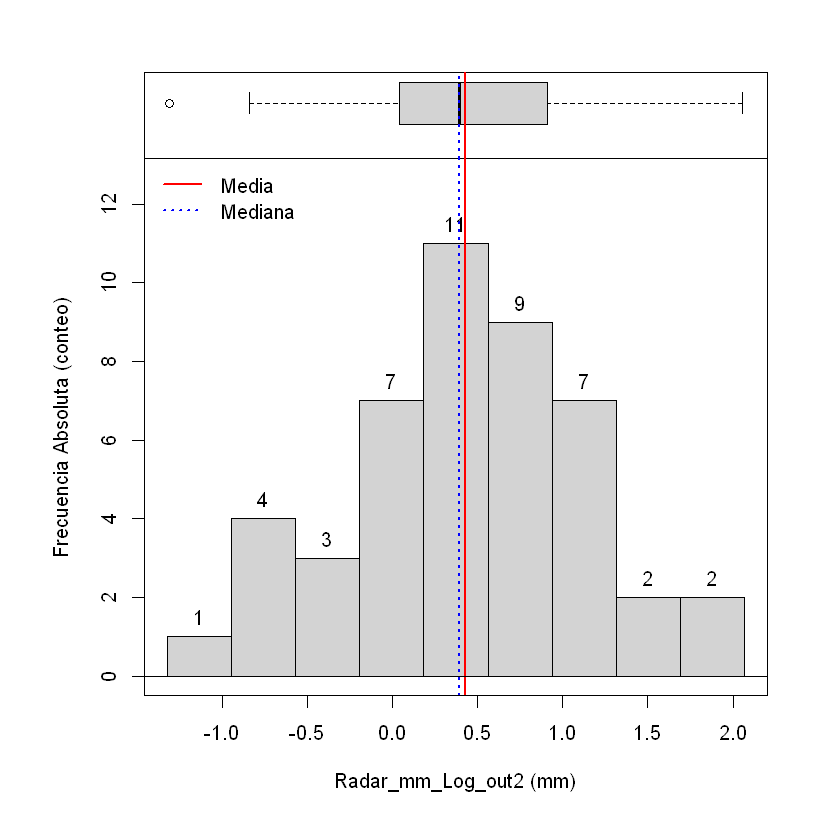

In [38]:
HistBoxplot(x=Radar_mm_Log_out2, mean = Radar_mm_Log_out2_Stat[5,2], median = Radar_mm_Log_out2_Stat[4,2], main ="", 
            xlab = "Radar_mm_Log_out2 (mm)", ylab = "Frecuencia Absoluta (conteo)", AbsFreq = TRUE, PercentFreq = FALSE,
            nbin = 9)

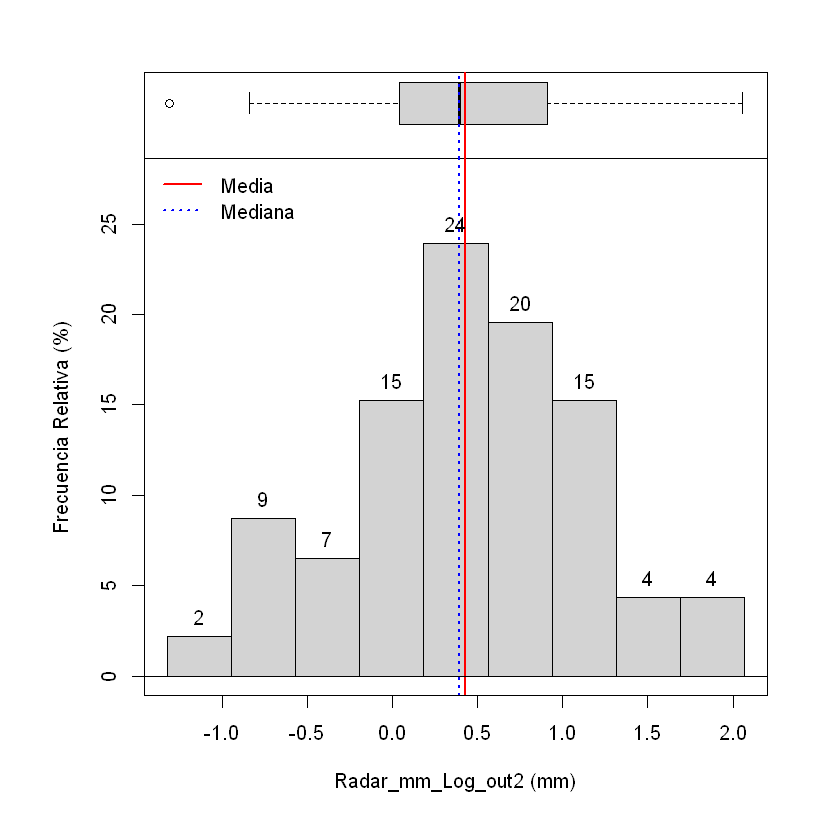

In [39]:
HistBoxplot(x=Radar_mm_Log_out2, mean = Radar_mm_Log_out2_Stat[5,2], median = Radar_mm_Log_out2_Stat[4,2], main ="", 
            xlab = "Radar_mm_Log_out2 (mm)", ylab = "Frecuencia Relativa (%)", AbsFreq = FALSE, PercentFreq = TRUE,
            nbin = 9)

La diferencia entre la media y la mediana de la transformación logarítmica quitando los valores atípicos detectados pasó de 0.0313 a 0.0351, es decir, aumentó el valor, sin ser significativo este aumento, con lo cual podemos considerar que hacer el segundo retiro de valores atípicos es innecesario.

### Análisis estadístico univariado para los datos obtenidos de pluviómetros (Pluv_mm).

Ahora se hace el mismo análisis estadístico a los datos obtenidos de los pluviómetros (Pluv_mm). Empezamos obteniendo los valores estadísticos.

In [40]:
Pluv_mm_Stat <- Estadisticas(Pluv_mm)
Pluv_mm_Stat

,Statistics,Values
,<chr>,<dbl>
muestras,n,50.0000
minimos,Minimum,0.2500
cuantiles1,1st. Quartile,0.3125
medianas,Median,1.0000
medias,Mean,1.4700
cuantiles3,3rd. Quartile,1.9375
maximos,Maximum,7.7500
rangos,Rank,7.5000
rangosInt,Interquartile Rank,1.6250


Y su respectivo histograma.

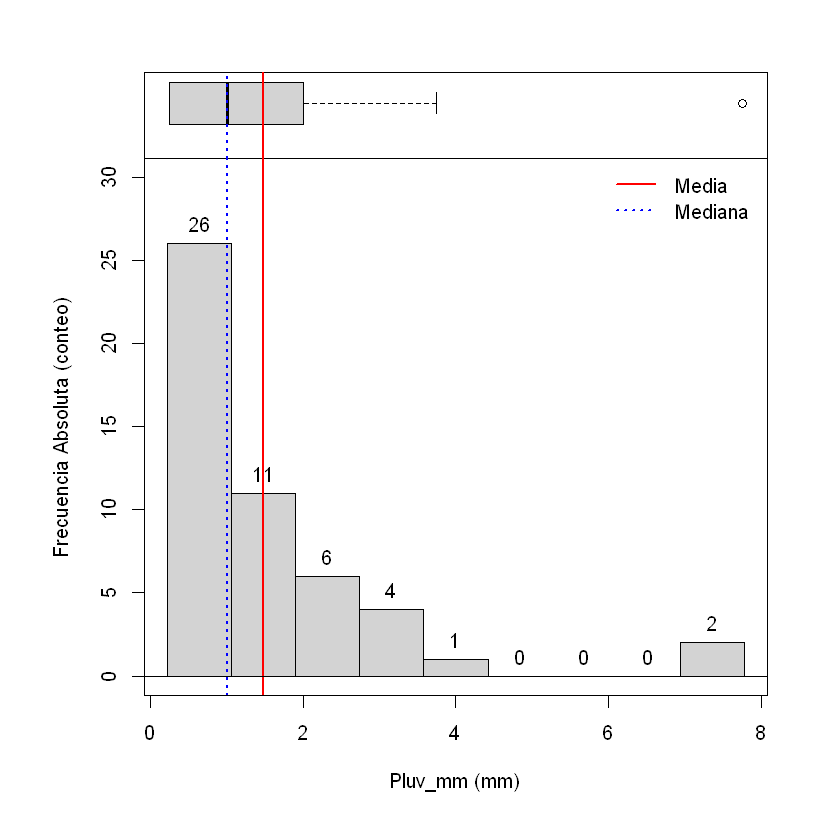

In [41]:
HistBoxplot(x=Pluv_mm, mean = Pluv_mm_Stat[5,2], median = Pluv_mm_Stat[4,2], main ="", 
            xlab = "Pluv_mm (mm)", ylab = "Frecuencia Absoluta (conteo)", AbsFreq = TRUE, PercentFreq = FALSE,
            nbin = 9)

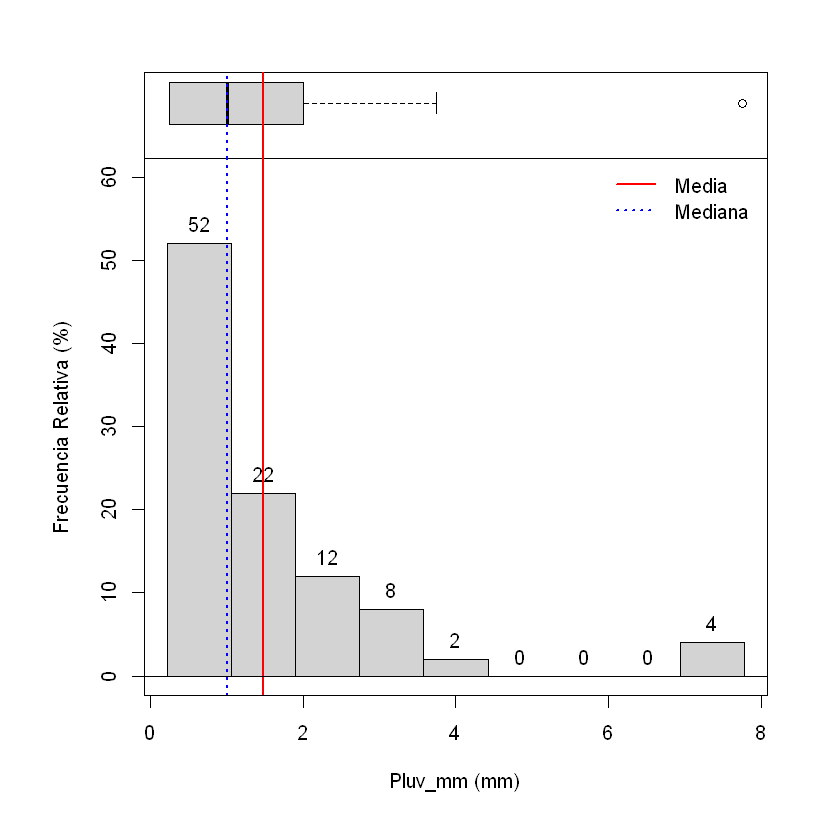

In [42]:
HistBoxplot(x=Pluv_mm, mean = Pluv_mm_Stat[5,2], median = Pluv_mm_Stat[4,2], main ="", 
            xlab = "Pluv_mm (mm)", ylab = "Frecuencia Relativa (%)", AbsFreq = FALSE, PercentFreq = TRUE,
            nbin = 9)

Podemos notar que la diferencia entre la media y la mediana es de 0.47, lo cual nos indica que la variable es asimétrica positiva y el histograma nos confirma esta información.

$\textbf{Transformación logarítmica.}$

Analizando el histograma podemos notar un fuerte crecimiento en la parte izquierda, por lo tanto usaremos la transformación logarítmica.

In [43]:
Pluv_mm_Log <- log(Pluv_mm)
Pluv_mm_Log_Stat <- Estadisticas(Pluv_mm_Log)
Pluv_mm_Log_Stat

,Statistics,Values
,<chr>,<dbl>
muestras,n,50.0000
minimos,Minimum,-1.3863
cuantiles1,1st. Quartile,-1.2130
medianas,Median,0.0000
medias,Mean,-0.0903
cuantiles3,3rd. Quartile,0.6598
maximos,Maximum,2.0477
rangos,Rank,3.4340
rangosInt,Interquartile Rank,1.8728


Los histogramas de la transformación logarítmica son los siguientes:

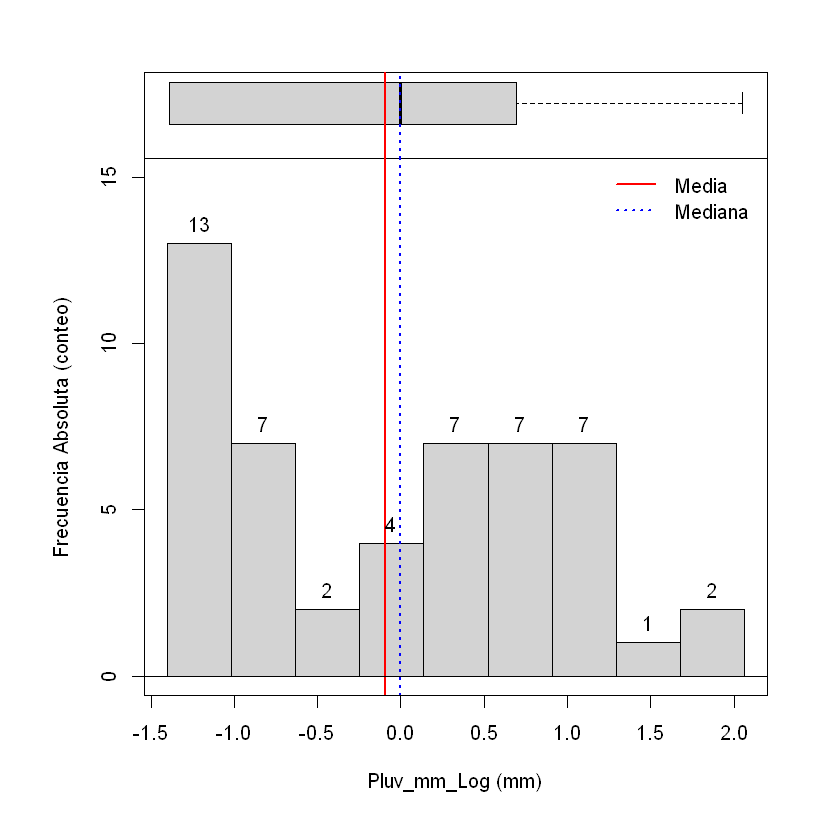

In [44]:
HistBoxplot(x=Pluv_mm_Log, mean = Pluv_mm_Log_Stat[5,2], median = Pluv_mm_Log_Stat[4,2], main ="", 
            xlab = "Pluv_mm_Log (mm)", ylab = "Frecuencia Absoluta (conteo)", AbsFreq = TRUE, PercentFreq = FALSE,
            nbin = 9)

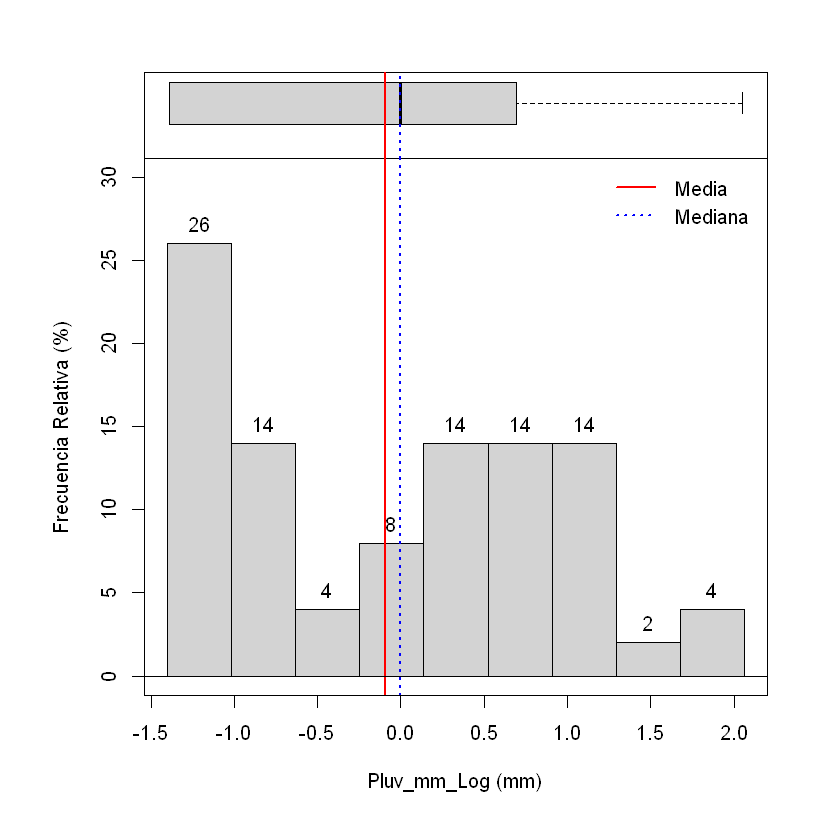

In [45]:
HistBoxplot(x=Pluv_mm_Log, mean = Pluv_mm_Log_Stat[5,2], median = Pluv_mm_Log_Stat[4,2], main ="", 
            xlab = "Pluv_mm_Log (mm)", ylab = "Frecuencia Relativa (%)", AbsFreq = FALSE, PercentFreq = TRUE,
            nbin = 9)

La diferencia entre la media y la mediana pasó de 0.47 a 0.09, lo cual es bajo. El boxplot no muestra valores atípicos, sin embargo, nos aseguraremos que esto sea cierto usando la función "OutliersPos".

In [46]:
Pluv_mm_Log_outliers<-OutliersPos(Pluv_mm_Log)
print(Pluv_mm_Log_outliers)

numeric(0)


No se encontraron valores atípicos, por lo tanto, aquí se termina el análisis univariado de esta variable.

## Análisis estadístico bivariado.

Como pudimos notar durante el análisis exploratorio univariado, necesitamos de dos elementos para interpretar las características estadísticas de una variable: un histograma y una tabla con los valores estadísticos. Con el caso del análisis exploratorio bivariado necesitamos un diagrama de dispersión o scatterplot y los grados de dependencia.

Un diagrama de dispersión es una gráfica compuesta por pares de valores de dos variables aleatorias $(x_i,y_i)$.

Los grados de dependencia se miden usando el coeficiente de correlación lineal de Pearson:

$$\rho_{XY}=\frac{\sigma_{XY}}{\sigma_{X}\sigma_{Y}}==\frac{Cov(X,Y)}{\sqrt(Var(X)Var(Y))}$$

El coeficiente de correlación de Spearman:

$$\rho=1-\frac{6\sum{D^2}}{N(N^2-1)}$$

Y el coeficiente de correlación de Kendall:

$$\tau=\frac{{\textit{𝑛ú𝑚𝑒𝑟𝑜 𝑑𝑒 𝑝𝑎𝑟𝑒𝑠 𝑐𝑜𝑛𝑐𝑜𝑟𝑑𝑎𝑛𝑡𝑒𝑠−𝑛ú𝑚𝑒𝑟𝑜 𝑑𝑒 𝑝𝑎𝑟𝑒𝑠 𝑑𝑖𝑠𝑐𝑜𝑟𝑑𝑎𝑛𝑡𝑒𝑠}}}{\bigl(\begin{smallmatrix}n\\ 2\end{smallmatrix}\bigr)}$$

### Cálculo de grados de dependencia

Para calcular estos grados de dependencia lo hacemos de la siguiente forma:

In [47]:
cor(Radar_mm , Pluv_mm, method = "pearson")

[1] 0.9410485

In [48]:
cor(Radar_mm , Pluv_mm, method = "spearman")

[1] 0.8480453

In [49]:
cor(Radar_mm , Pluv_mm, method = "kendall")

[1] 0.7187151

Respecto al coeficiente de Pearson, su valor es de 0.9410, lo cual podemos considerar como cuasi-lineal. Sin embargo, los valores de la correlación de Spearman (0.8480) y Kendall (0.7187) indican que el modelo no es cuasi-lineal, por lo que es posible que la dependencia lineal esté alterada por valores atípicos.

### Diagrama de dispersión.

El diagrama de dispersión se grafica de la siguiente manera:

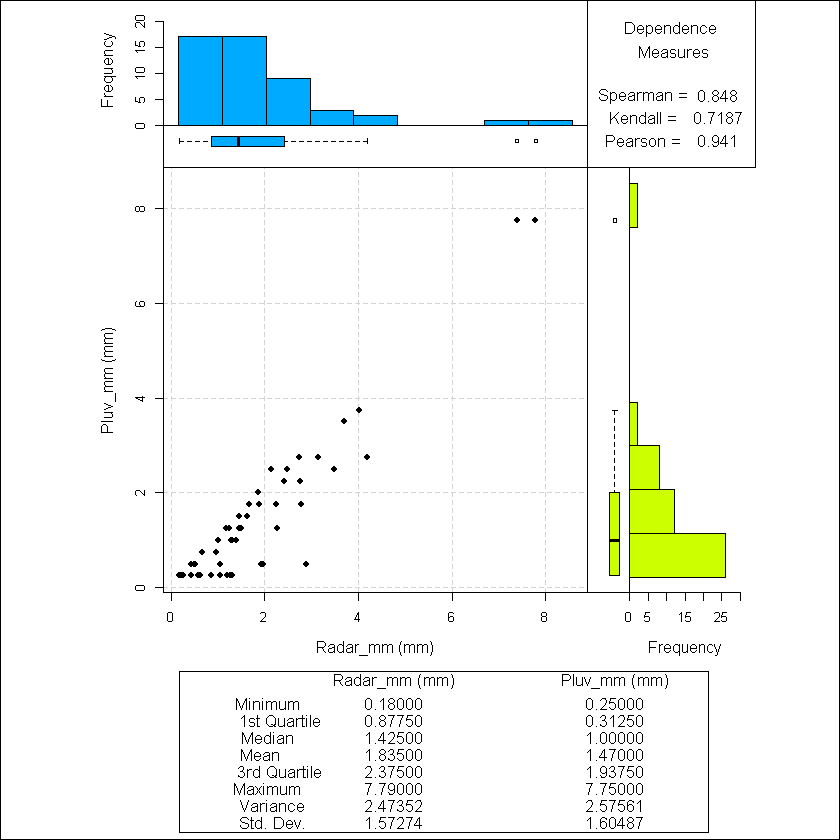

In [50]:
ScatterPlot(Radar_mm , Pluv_mm, 9, 
            Xmin = Radar_mm_Stat[2,2], Xmax = Radar_mm_Stat[7,2], 
            Ymin = Pluv_mm_Stat[2,2],Ymax = Pluv_mm_Stat[7,2], 
            XLAB = "Radar_mm (mm)", YLAB = "Pluv_mm (mm)")

Podemos notar en el gráfico de dispersión que hay dos pares atípicos localizados en la esquina superior derecha, los cuales podrían ser la causa de la cuasi-linearidad que indica la medida de dependencia de Pearson. Estos valores coinciden con los valores atípicos que se detectaron durante el análisis univariado, Sin embargo, es importante señalar que los valores atípicos encontrados en el análisis exploratorio univariado no son necesariamente valores atípicos en el análisis exploratorio bivariado, se debe evaluar la conveniencia de retirar cada par.

### Analisis de regresión lineal.

Como se mencionó en clase, la regresión trata de establecer relaciones funcionales entre variables aleatorias, en este caso, la relación se establece con una recta. Para hacer el análisis necesitamos de los parámetros de la recta y el análisis de residuos.

El grafico de dispersión con línea de regresión se genera de la siguiente forma:

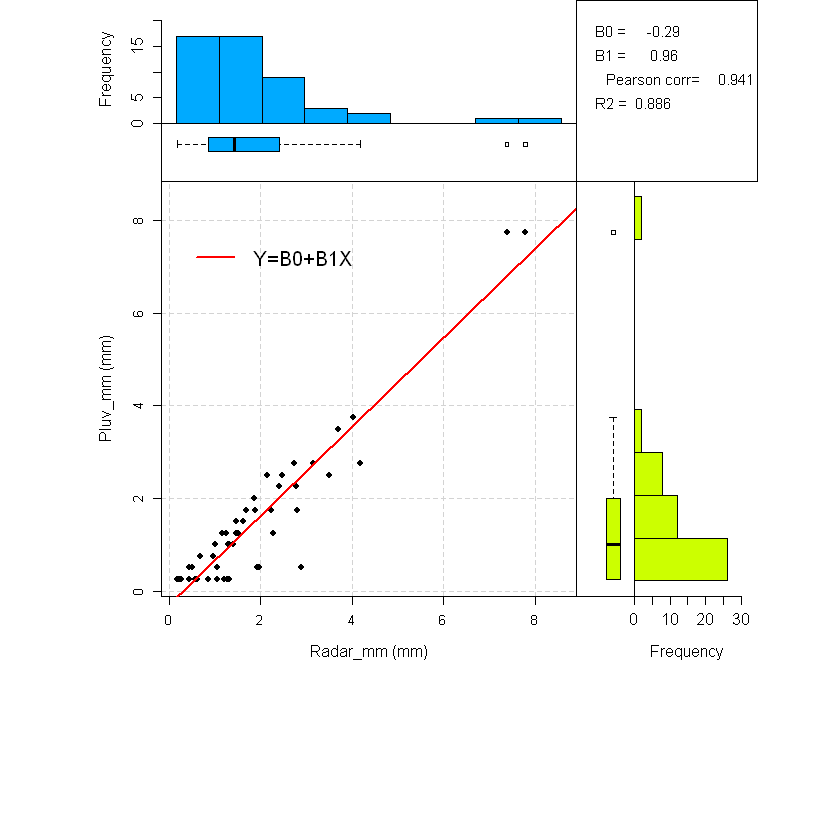

In [51]:
scaterplotReg(Radar_mm , Pluv_mm, 9, 
              Xmin = Radar_mm_Stat[2,2], Xmax = Radar_mm_Stat[7,2], 
              Ymin = Pluv_mm_Stat[2,2],Ymax = Pluv_mm_Stat[7,2], 
              XLAB = "Radar_mm (mm)", YLAB = "Pluv_mm (mm)")

De este grafico nos interesa saber los valores de la regresión lineal y su error cuadratico. Para hacer la regresión lineal usamos la función "linear_regression":

In [52]:
# Linear Regression
X<-Radar_mm
Y<-Pluv_mm

linear_regression <-lm(Y ~ X)

# Linear Regression Parameters
B0 <- linear_regression$coefficients[1]
B0
B1 <- linear_regression$coefficients[2]
B1

(Intercept) 
  -0.292099

X 
0.9602719

Ya que tenemos los parámetros de la recta $B_0$ y $B_1$, hacemos el calculo de los residuos.

In [53]:
# Regression line and Residual Calculation
Y_Regression <- linear_regression$fitted.values
Y_Residual <- linear_regression$residuals

Ya que tenemos calculados los residuos necesitamos obtener sus valores estadísticos.

In [54]:
Y_Residual_Stat<-Estadisticas(Y_Residual)
write.csv(Y_Residual_Stat , file = "Results/AED/Pluv_mm_Residual_Stat.csv")
Y_Residual_Stat

,Statistics,Values
,<chr>,<dbl>
muestras,n,5.000000e+01
minimos,Minimum,-1.973500e+00
cuantiles1,1st. Quartile,-1.988000e-01
medianas,Median,1.562000e-01
medias,Mean,0.000000e+00
cuantiles3,3rd. Quartile,3.552000e-01
maximos,Maximum,9.457000e-01
rangos,Rank,2.919200e+00
rangosInt,Interquartile Rank,5.540000e-01


Y tambien necesitamos obtener el histograma de estos residuos.

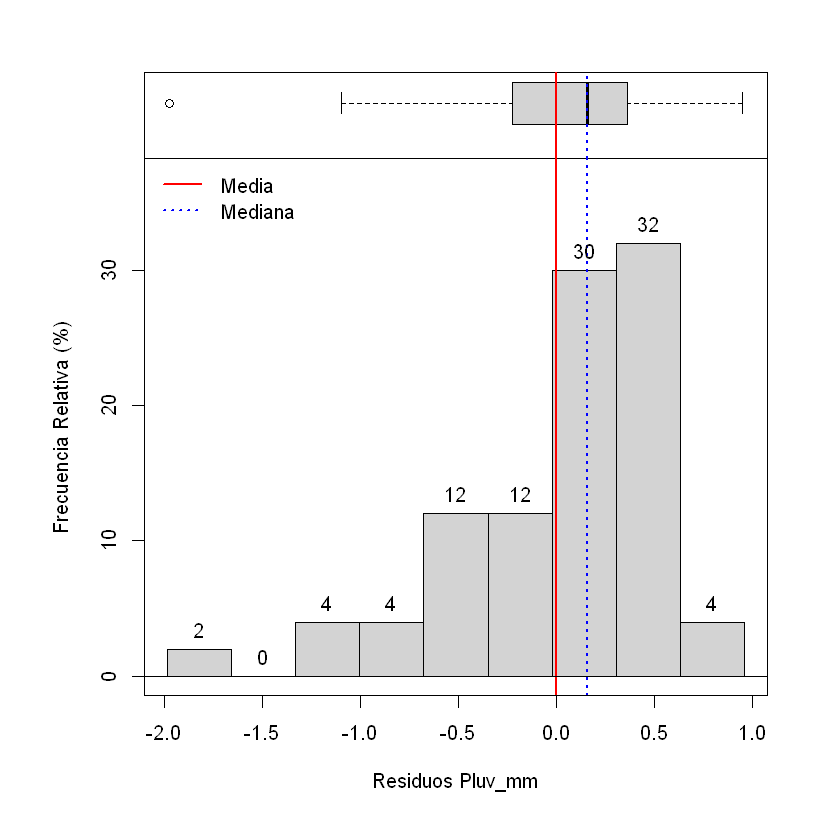

In [55]:
HistBoxplot(x=Y_Residual, mean = Y_Residual_Stat[5,2], median = Y_Residual_Stat[4,2], main ="", 
            xlab = "Residuos Pluv_mm", ylab = "Frecuencia Relativa (%)", AbsFreq = FALSE, PercentFreq = TRUE )

Si analizamos los valores estadísticos y el histograma de los residuos, podemos notar que el valor esperado es de 0, su varianza es de 0.2947 y la diferencia entre la media y la mediana es de 0.1562, lo cual nos indica que tiene asimetría negativa, por lo tanto, los residuos no cumplen con todas las condiciones que demanda la regresión lineal.

$start.arg
$start.arg$mean
[1] -2.341877e-18

$start.arg$sd
[1] 0.5374263


$fix.arg
NULL



Warning message in hist.default(data, breaks = breaks, plot = FALSE, ...):
"argument 'col' is not made use of"


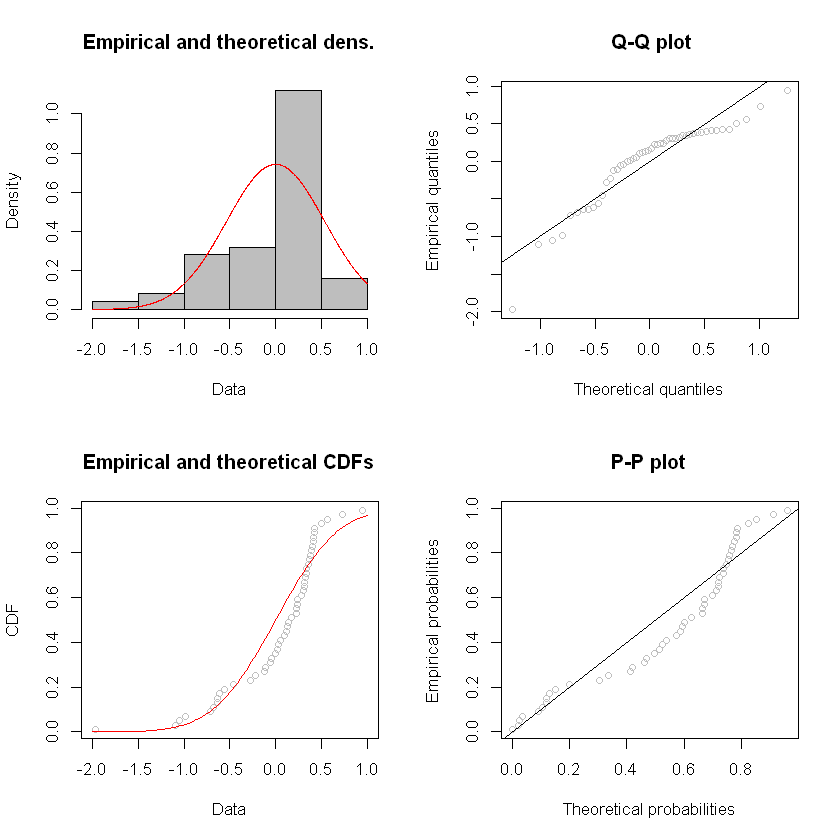

In [56]:
FitDistr2_Residual_normal<-FitDistribution(data = Y_Residual, DISTR="norm", BREAKS = "Sturges", col = "gray",  DistName = "Normal")

Para confirmar que los residuos no cumplen con las condiciones de la regresión lineal podemos sobreponer el histograma con la distribución normal (figura superior izquierda), ahí podemos ver que una de las barras del histograma sobrepasa a la función de distribución. El grafico Q-Q plot (figura superior derecha) también muestra que solo unas pocas muestras están en la recta. La grafica comparativa entre las funciones de distribución acumulativas empírica y teórica (figura inferior izquierda) no muestran un buen ajuste Y en el caso del grafico P-P plot (figura inferior derecha) solo las muestras de la esquina inferior izquierda y unas pocas de la parte central se posicionan cerca de la recta.

Ahora debemos aplicar un test de normalidad, en este caso tenemos dos opciones: hipótesis de Kolmogorov-Smirnov y la hipótesis de Anderson-Darling.

La hipótesis de Kolmogorov-Smirnov se usa para contrastar la hipótesis de normalidad, el estadístico de prueba es la máxima diferencia:

$$D=máx|F_n(x)-F_{va}(x)|$$

Donde $F_n(x)$ es la función de distribución paramétrica, en este caso la función normal. Y $F_{va}(x)$ es la función de la variable aleatoria.

La hipótesis de Anderson-Darling es una prueba no paramétrica que se basa en la comparación de las muestras $\textbf{Y}$ y la función de distribución de probabilidad teórica $\textbf{F}$. Su fórmula es:

$$S=\sum_{k=1}^{N}\frac{2k-1}{N}\left[ln(F(Y_k))+ln(1-F(Y_{N+1-k}))\right]$$

El valor p es una probabilidad que mide la evidencia en contra de la hipótesis nula. Un valor p más pequeño proporciona una evidencia más fuerte en contra de la hipótesis nula. esta hipotesis se usa para determinar si los datos siguen una distribución normal.

Si $p\leq a$ donde a es el nivel de significancia la decisión es rechazar la hipótesis nula y concluir que sus datos no siguen una distribución normal.

Si $p>a$ donde a es el nivel de significancia la decisión es no rechazar la hipótesis nula y concluir que sus datos no tiene suficiente evidencia para concluir que los datos no siguen una distribución normal.

In [57]:
FD_HT_Residual_normal<-FitDistr2_Residual_normal$x
FD_HT_Residual_normal

Nombre,Nivel de significancia,P-valor,Estad?stico,Decisi?n
<chr>,<chr>,<chr>,<chr>,<chr>
Kolmogorov-Smirnov,0.05,0.136,0.1605,No rechazo H0
Anderson-Darling,0.05,0.07826,2.13,No rechazo H0


Bajo la prueba de Kolmogorov-Smirnov podemos ver que la normalidad de los residuos es de no rechazo. Mientras que la prueba de Anderson-Darling no rechaza la hipótesis de normalidad. Sin embargo, los valores obtenidos de estas pruebas son muy cercanos al nivel de significancia, por lo que podríamos reforzar la evidencia de no normalidad de la variable.

In [58]:
FD_FP_Residual_normal<-FitDistr2_Residual_normal$y
FD_FP_Residual_normal

,Normal
,<dbl>
Media,-2.341877e-18
Desviaci?n est?ndar,5.374263e-01
M?xima Verosimilitud,-3.989875e+01
AICC,8.379750e+01


Los siguientes gráficos son los mismos que se analizaron en el vector "FitDistr2_Residual_normal", tenemos el histograma la funcion de distribución normal.

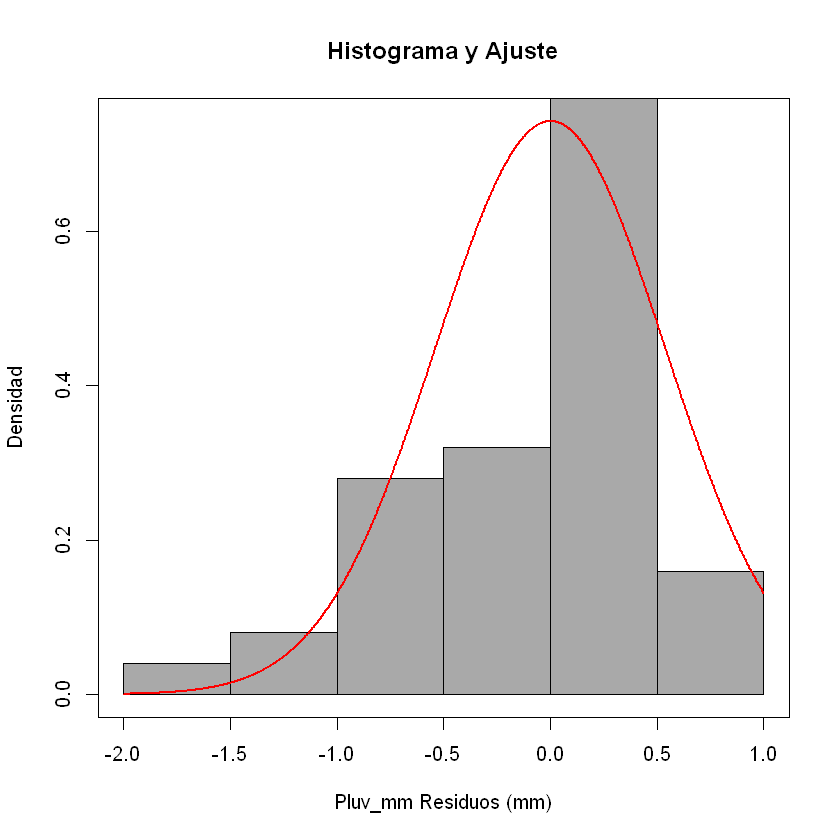

In [59]:
PARA_Residual_normal <- list(mean = as.numeric(FD_FP_Residual_normal[1,1]), sd = as.numeric(FD_FP_Residual_normal[2,1]))
HistModel(x = Y_Residual, distr = "norm", para = PARA_Residual_normal, breaks = "Sturges", freq = FALSE, main ="Histograma y Ajuste", xlab = "Pluv_mm Residuos (mm)", 
          ylab = "Densidad", colCurve =  "red", col = "darkgray")

Graficamos su función de distribución acumulativa.

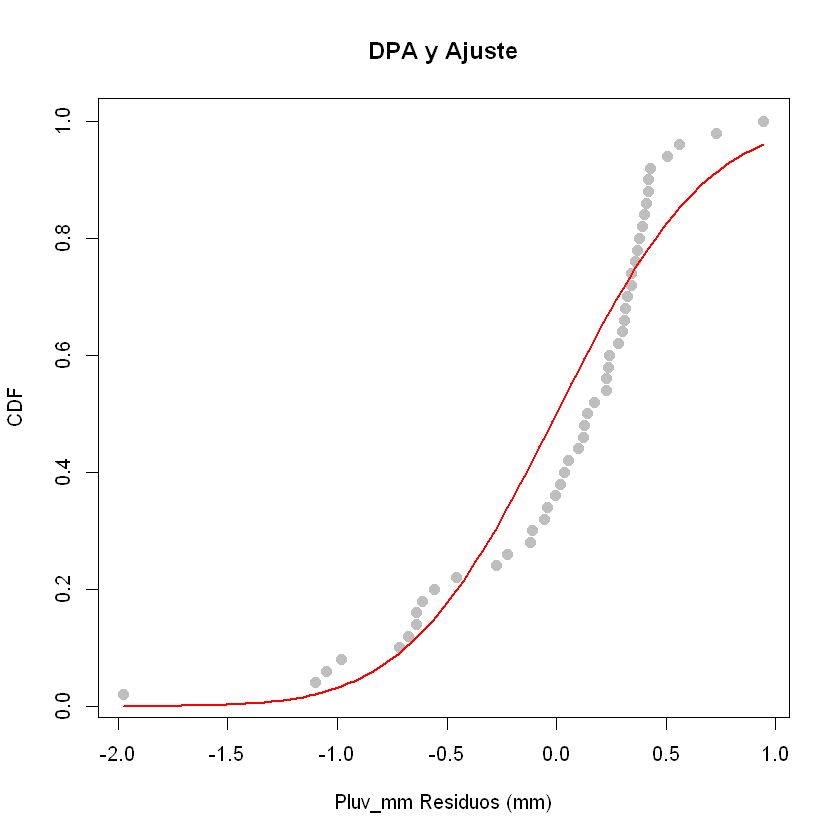

In [60]:
CDF(x = Y_Residual, distr = "norm", para = PARA_Residual_normal, col = "gray", main = "DPA y Ajuste", xlab = "Pluv_mm Residuos (mm)", 
    lcol = "red", lwd = 2)

El Grafico cuantil-cuantil (Q-Q plot).

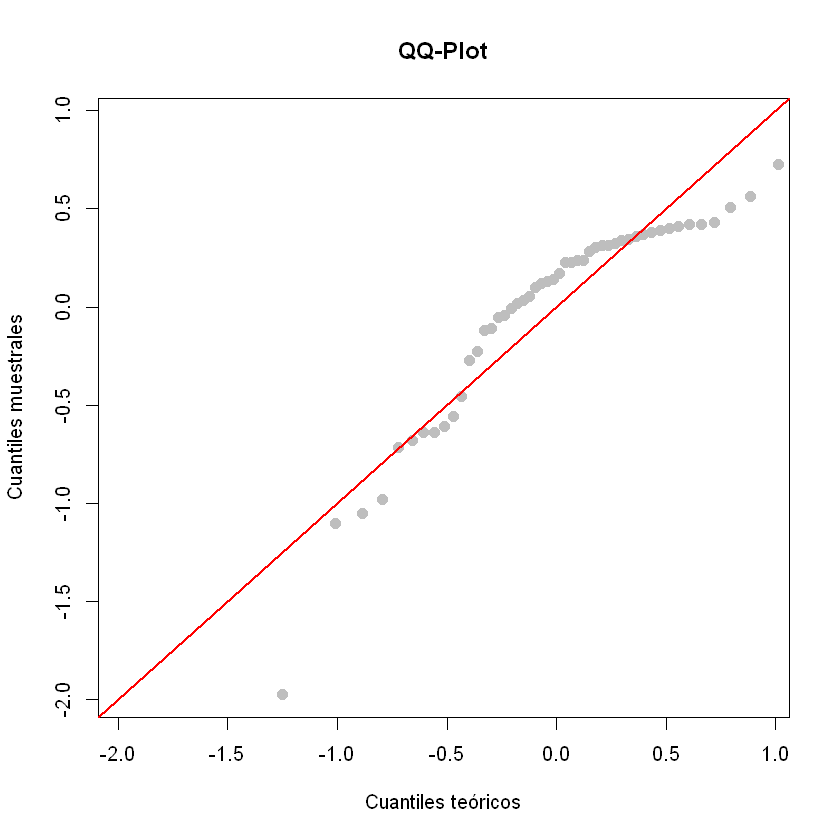

In [61]:
QQplot(x = Y_Residual, distr = "norm", para = PARA_Residual_normal, col = "gray", main = "QQ-Plot", xlab = "Cuantiles teóricos", 
       lcol = "red", lwd = 2)

El Grafico percentil-percentil (P-P plot).

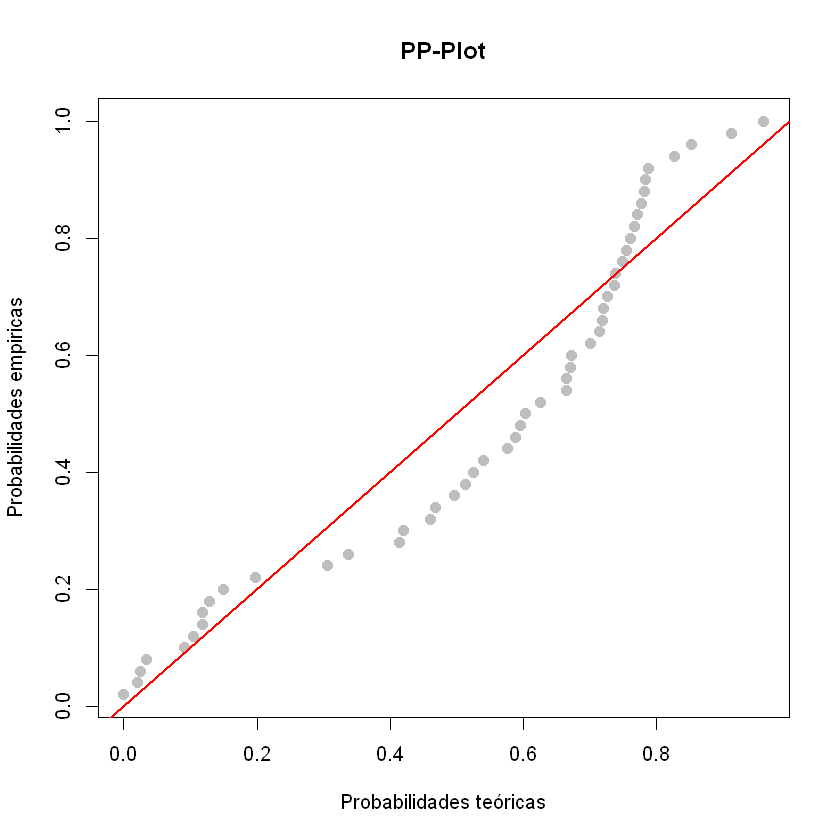

In [62]:
PPplot(x = Y_Residual, distr = "norm", para = PARA_Residual_normal, col = "gray", main = "PP-Plot", xlab = "Probabilidades teóricas", 
       lcol = "red", lwd = 2)

### Analisis bivariado: Y vs Y residual.

Ahora necesitamos evaluar si los valores obtenidos del pluviómetro tienen una relación con los residuos, para esto necesitamos el gráfico de dispersión. El cual generamos de la siguiente forma:

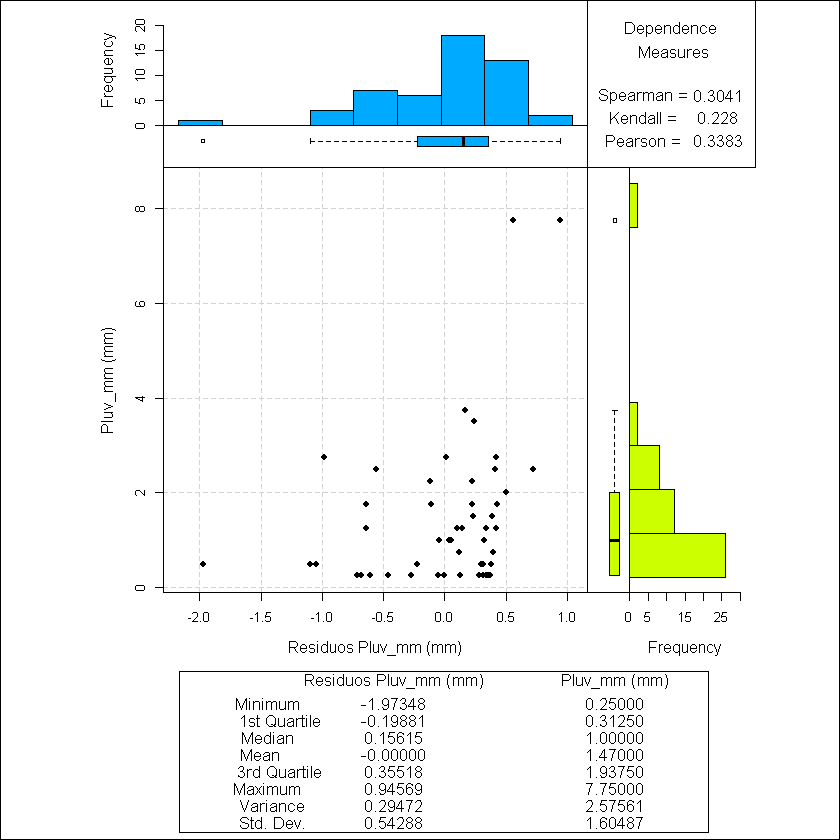

In [63]:
X<-Y_Residual   # Y_Residual is the independent variable

Y<-Pluv_mm      # Pluv_mm is the dependent variable

ScatterPlot(X, Y, 9, 
           Xmin = Y_Residual_Stat[2,2], Xmax = Y_Residual_Stat[7,2], 
           Ymin = Pluv_mm_Stat[2,2],Ymax = Pluv_mm_Stat[7,2], XLAB = "Residuos Pluv_mm (mm)", YLAB = "Pluv_mm (mm)")

En este grafico podemos notar que la medida de dependencia lineal de Pearson es de 0.339, Spearman es de 0.3041 y Kendall es de 0.228. Esto nos da como conclusión que la regresión lineal no cumple con la condición no correlación entre los residuos y las muestras del pluviómetro.

## Análisis estadístico bivariado con variables transformadas.

Ahora haremos el caso donde las variables (Radar_mm, Pluv_mm) tienen transformada logarítmica. Se escogió que las variables aleatorias usen esta transformación por los resultados que se tuvieron con la variable aleatoria de las muestras obtenidas con el pluviómetro.

### Grafico de dispersión.

En el grafico de dispersión podemos notar que las medidas de dependencia tienen los siguientes valores:

* Spearman (0.848)
* Kendall (0.7187)
* Pearson (0.8256)

Si comparamos las medidas de dependencia de este análisis estadístico bivariado con el anterior análisis podemos notar que el coeficiente de correlación de Pearson cambió de 0.9410 a 0.8256, mientras que los coeficientes de Spearman y Kendall se mantuvieron. esto muestra una gran ventaja al usar los coeficientes de Spearman y Kendall ya que no se ven afectados ante transformaciones.

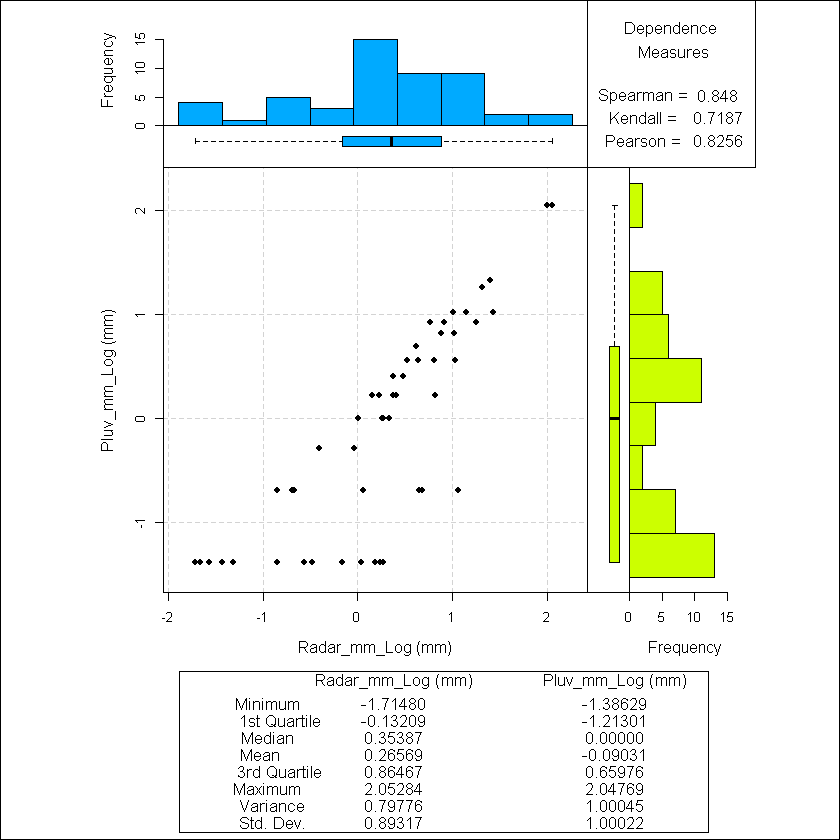

In [64]:
ScatterPlot(Radar_mm_Log , Pluv_mm_Log, 9, 
            Xmin = Radar_mm_Log_Stat[2,2], Xmax = Radar_mm_Log_Stat[7,2], 
            Ymin = Pluv_mm_Log_Stat[2,2],Ymax = Pluv_mm_Log_Stat[7,2], 
            XLAB = "Radar_mm_Log (mm)", YLAB = "Pluv_mm_Log (mm)")

### Analisis de regresión lineal.

Ahora obtendremos los valores de la regresión lineal .

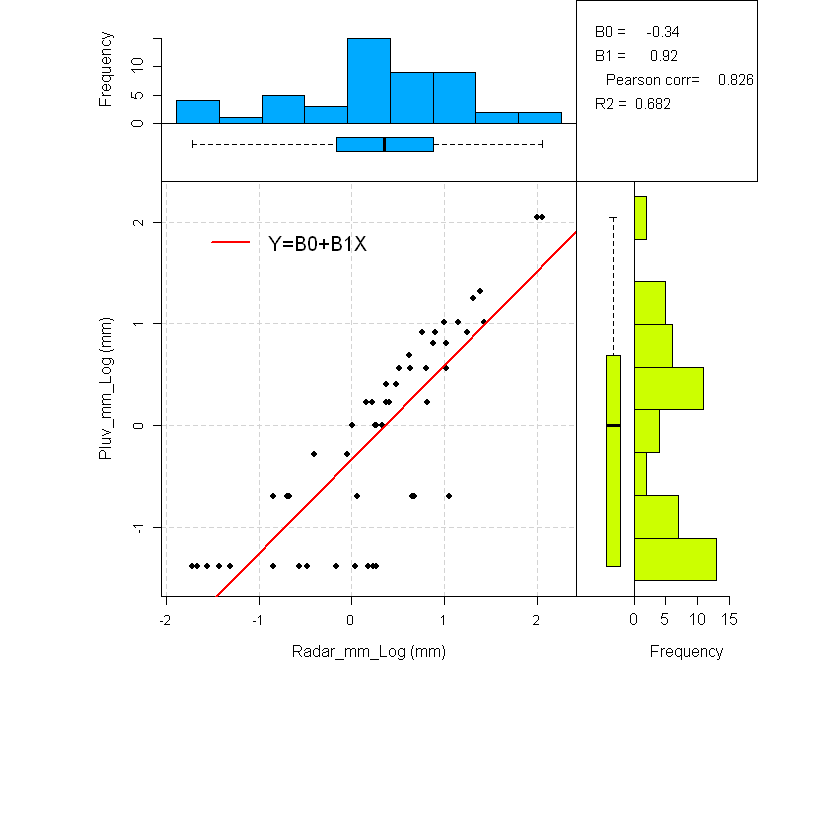

In [65]:
scaterplotReg(Radar_mm_Log , Pluv_mm_Log, 9, 
              Xmin = Radar_mm_Log_Stat[2,2], Xmax = Radar_mm_Log_Stat[7,2], 
              Ymin = Pluv_mm_Log_Stat[2,2],Ymax = Pluv_mm_Log_Stat[7,2], 
              XLAB = "Radar_mm_Log (mm)", YLAB = "Pluv_mm_Log (mm)")

los valores de la regresión lineal son:

In [66]:
# Linear Regression
X<-Radar_mm_Log
Y<-Pluv_mm_Log

linear_regression <-lm(Y ~ X)

# Linear Regression Parameters
B0 <- linear_regression$coefficients[1]
B0
B1 <- linear_regression$coefficients[2]
B1

(Intercept) 
 -0.3359718

X 
0.9246077

Procedemos a calcular los residuos

In [64]:
X<-Radar_mm_Log
Y<-Pluv_mm_Log

Y_Regression <- B0 + B1*X
Y_Residual <- Y-Y_Regression

Y calculamos sus estadígrafos e histograma.

In [67]:
# Regression line and Residual Calculation
Y_Regression <- linear_regression$fitted.values
Y_Residual <- linear_regression$residuals

Y_Residual_Stat<-Estadisticas(Y_Residual)
write.csv(Y_Residual_Stat , file = "Results/AED/Pluv_mm_Log_Residual_Stat.csv")
Y_Residual_Stat

,Statistics,Values
,<chr>,<dbl>
muestras,n,5.000000e+01
minimos,Minimum,-1.335200e+00
cuantiles1,1st. Quartile,-1.624000e-01
medianas,Median,2.373000e-01
medias,Mean,0.000000e+00
cuantiles3,3rd. Quartile,3.924000e-01
maximos,Maximum,5.445000e-01
rangos,Rank,1.879700e+00
rangosInt,Interquartile Rank,5.548000e-01


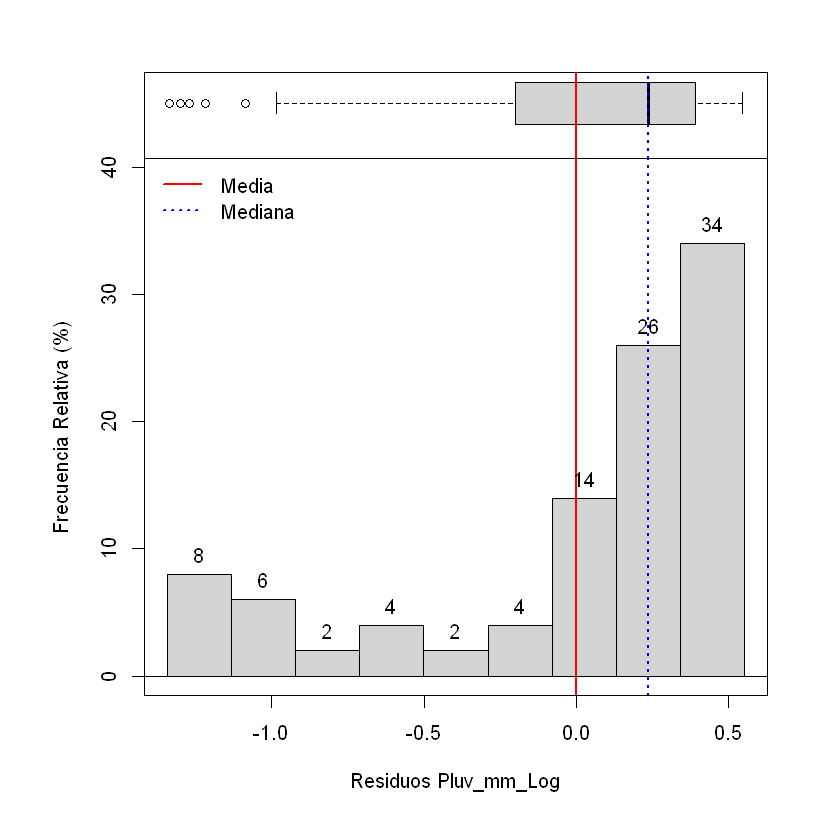

In [68]:
HistBoxplot(x=Y_Residual, mean = Y_Residual_Stat[5,2], median = Y_Residual_Stat[4,2], main ="", 
            xlab = "Residuos Pluv_mm_Log", ylab = "Frecuencia Relativa (%)", AbsFreq = FALSE, PercentFreq = TRUE )

En este caso podemos ver que el histograma presenta asimetría negativa con cuatro valores atípicos localizados a la izquierda. La diferencia entre la media y la mediana es de 0.2373, la cual es alta.

$start.arg
$start.arg$mean
[1] 3.88036e-18

$start.arg$sd
[1] 0.5586384


$fix.arg
NULL



Warning message in hist.default(data, breaks = breaks, plot = FALSE, ...):
"argument 'col' is not made use of"


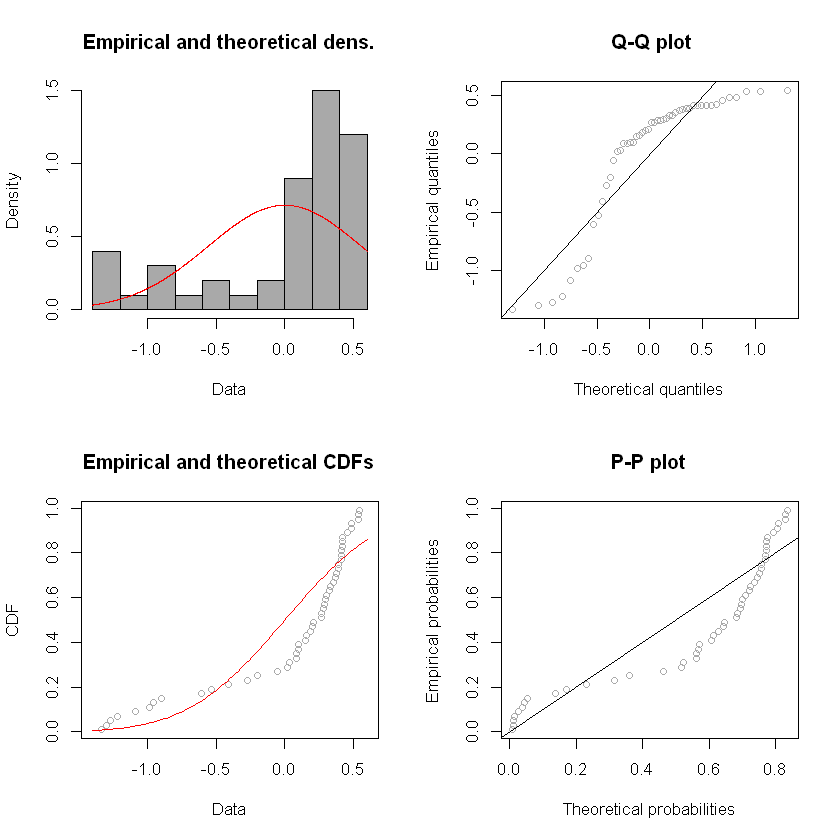

In [70]:
FitDistr2_Residual_normal<-FitDistribution(data = Y_Residual, DISTR="norm", BREAKS = "Sturges", col = "darkgray", DistName = "Normal")

Analizando los residuos podemos notar que el histograma con la distribución normal (figura superior izquierda) nos muestra que los residuos no son normales, en especial los valores localizados a los extremos del histograma. El grafico Q-Q plot (figura superior derecha) también muestra que pocas muestras están en la recta. La grafica comparativa entre las funciones de distribución acumulativas empírica y teórica (figura inferior izquierda) no muestra un buen ajuste y en el caso del grafico P-P plot (figura inferior derecha) hay muy pocas muestras cercanas a la recta. Con esto podemos concluir que los residuos no cumplen con los requisitos de la regresión lineal.

In [71]:
FD_HT_Residual_normal<-FitDistr2_Residual_normal$x
FD_HT_Residual_normal

Nombre,Nivel de significancia,P-valor,Estad?stico,Decisi?n
<chr>,<chr>,<chr>,<chr>,<chr>
Kolmogorov-Smirnov,0.05,0.004802,0.2412,Rechazo H0
Anderson-Darling,0.05,0.006424,4.282,Rechazo H0


Las pruebas de normalidad de Kolmogorov-Smirnov y Anderson-Darling confirman lo analizado con los graficos.

In [72]:
FD_FP_Residual_normal<-FitDistr2_Residual_normal$y
FD_FP_Residual_normal

,Normal
,<dbl>
Media,3.880360e-18
Desviaci?n est?ndar,5.586384e-01
M?xima Verosimilitud,-4.183428e+01
AICC,8.766856e+01


Graficamos las comparativas entre el histrograma y la funcion de distribución normal.

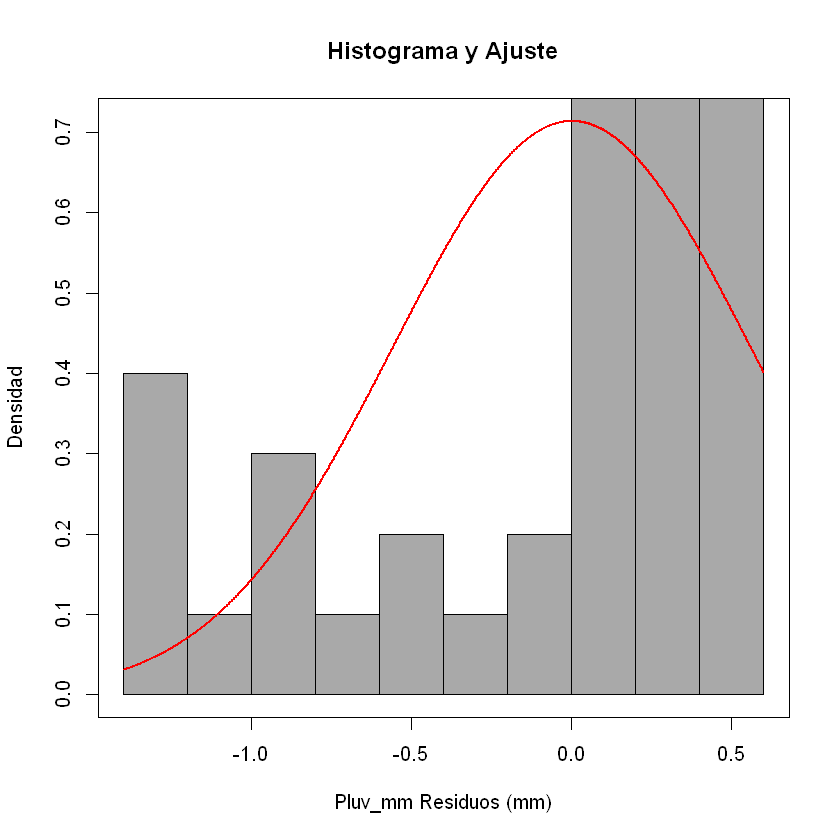

In [73]:
PARA_Residual_normal <- list(mean = as.numeric(FD_FP_Residual_normal[1,1]), sd = as.numeric(FD_FP_Residual_normal[2,1]))
HistModel(x = Y_Residual, distr = "norm", para = PARA_Residual_normal, breaks = "Sturges", freq = FALSE, main ="Histograma y Ajuste", xlab = "Pluv_mm Residuos (mm)", 
          ylab = "Densidad", colCurve =  "red", col = "darkgray")

Graficamos las comparativas entre la función de distribución acumulativa empírica y la función de distribución acumulativa normal.

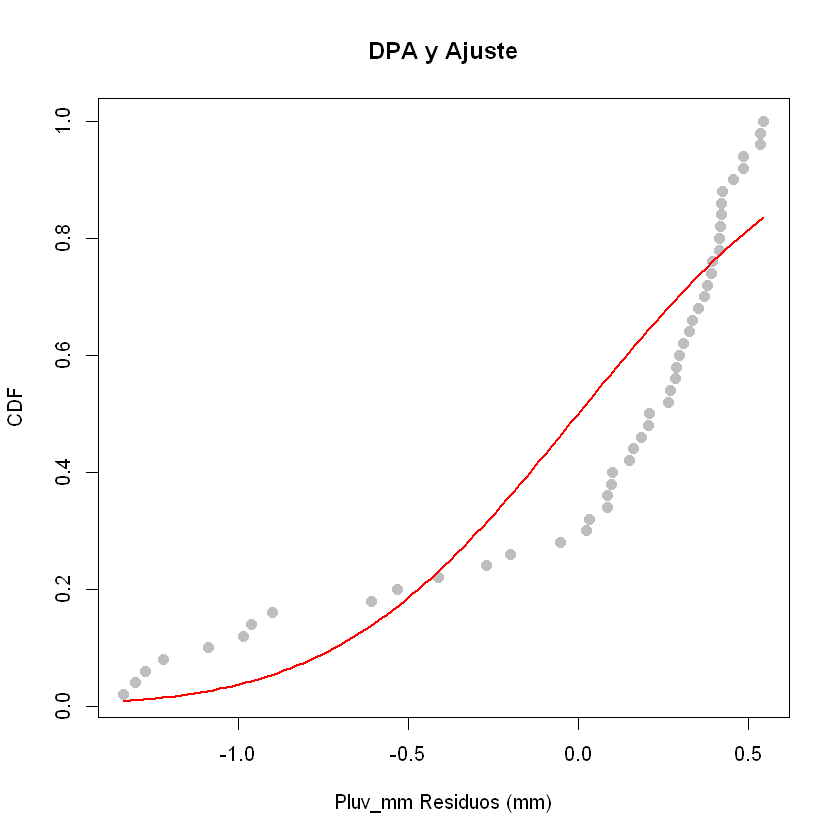

In [74]:
CDF(x = Y_Residual, distr = "norm", para = PARA_Residual_normal, col = "gray", main = "DPA y Ajuste", xlab = "Pluv_mm Residuos (mm)", 
    lcol = "red", lwd = 2)

El Grafico cuantil-cuantil (Q-Q plot). 

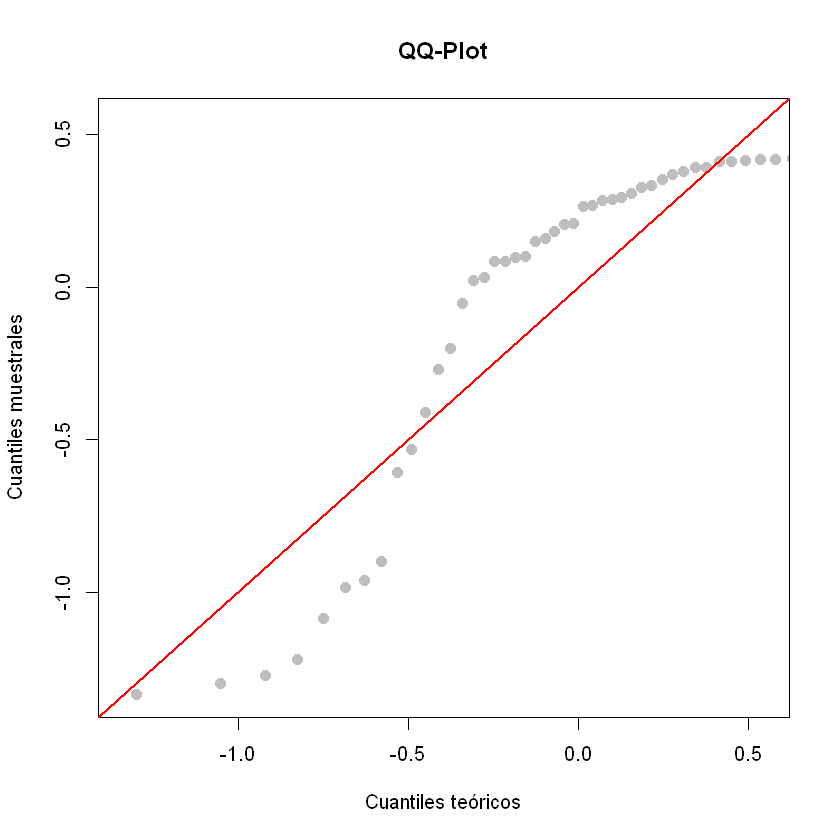

In [75]:
QQplot(x = Y_Residual, distr = "norm", para = PARA_Residual_normal, col = "gray", main = "QQ-Plot", xlab = "Cuantiles teóricos", 
       lcol = "red", lwd = 2)


El Grafico Percentil-percentil (P-P plot).

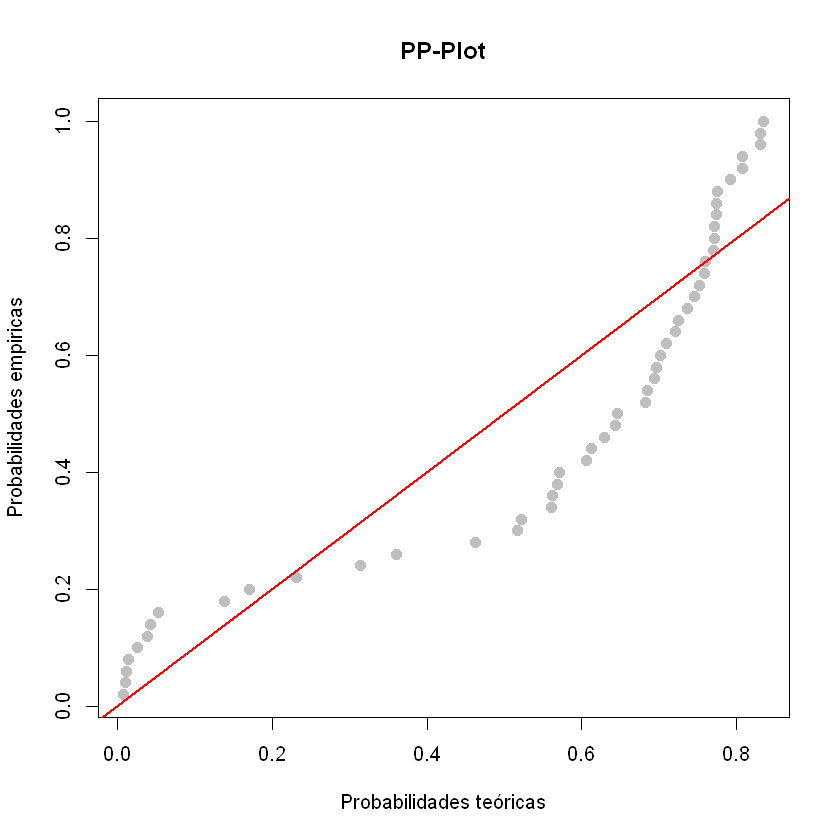

In [76]:
PPplot(x = Y_Residual, distr = "norm", para = PARA_Residual_normal, col = "gray", main = "PP-Plot", xlab = "Probabilidades teóricas", 
       lcol = "red", lwd = 2)

### Analisis bivariado: Y vs Y residual.


In [77]:
X<-Y_Residual     # Y_Residual es la variable invependiente
Y<-Pluv_mm_Log    # Pluv_mm_Log es la variable dependiente

Ahora Analizaremos la dependencia entre la variable aleatoria con transformación logarítmica y sus residuos. Se hace el grafico de dispersión.

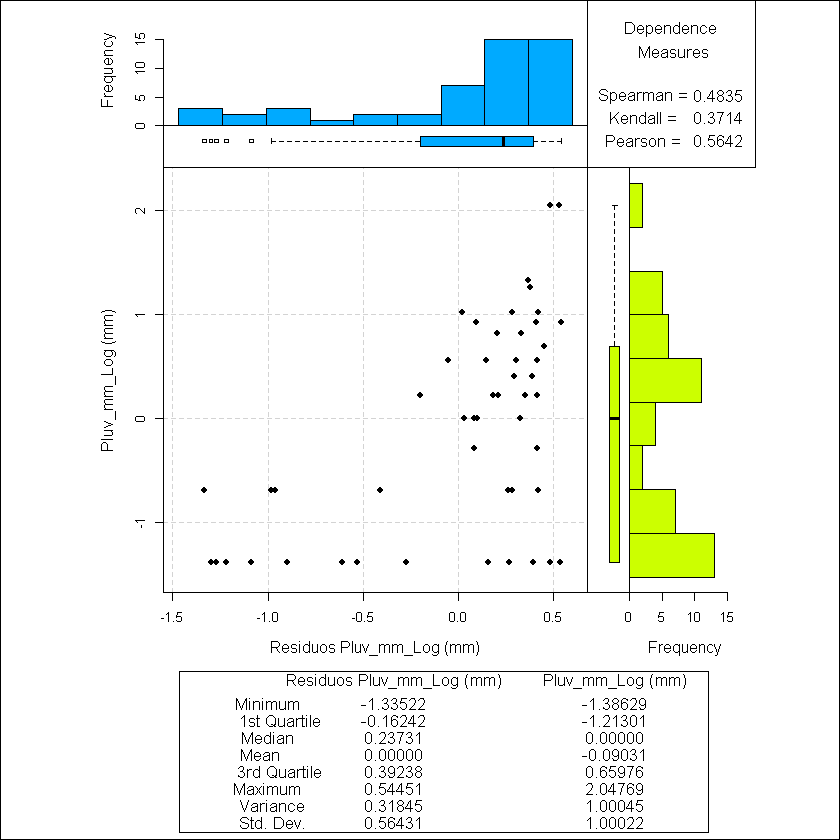

In [78]:
ScatterPlot(X, Y, 9, 
           Xmin = Y_Residual_Stat[2,2], Xmax = Y_Residual_Stat[7,2], 
           Ymin = Pluv_mm_Log_Stat[2,2],Ymax = Pluv_mm_Log_Stat[7,2], XLAB = "Residuos Pluv_mm_Log (mm)", YLAB = "Pluv_mm_Log (mm)")

El resultado de las medidas de dependencia muestra que la dependencia es considerable. Pearson tiene un valor de 0.5702, Spearman es de 0.4971 y Kendall es de 0.3818. Con esta última prueba podemos concluir que la regresión lineal usando las variables aleatorias transformadas no cumplió con ninguna de las condiciones.

Con el caso de las muestras obtenidas de los pluviómetros, podemos ver que los valores atípicos se localizan en los mismos lugares de los valores atípicos obtenidos del radar meteorológico, por lo que debemos tomar en cuenta esta información para el análisis variografico.